In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import pickle

[juliapkg] Found dependencies: /home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.5 to /home/ajt6830/miniconda3/envs/pysr_env/julia_env/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.1

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/miniconda3/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.25
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.1+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/miniconda3/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.1
  [8d63f2c5] + DispatchDoctor v0.4.22
  [ffbed154] + DocStringExtensions v0.9.5
⌅ [731

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
pip install sxs

  Using cached sxs-2025.0.17-py3-none-any.whl.metadata (13 kB)
  Using cached bibtexparser-2.0.0b8-py3-none-any.whl.metadata (5.4 kB)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached quaternionic-1.0.15-py3-none-any.whl.metadata (18 kB)
  Using cached spherical-1.0.16-py3-none-any.whl.metadata (7.7 kB)
  Using cached sxscatalog-3.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (520 bytes)
Using cached sxs-2025.0.17-py3-none-any.whl (224 kB)
Using cached bibtexparser-2.0.0b8-py3-none-any.whl (39 kB)
Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB

In [3]:
import sxs
print(sxs.__file__)
print(sxs.__version__)
print(dir(sxs))

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/sxs/__init__.py
2025.0.17
['Catalog', 'HorizonQuantities', 'Horizons', 'Metadata', 'Simulation', 'Simulations', 'TimeSeries', 'WaveformModes', 'WaveformModesDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'astronomical_unit', 'catalog', 'citation', 'cite', 'doi_prefix', 'doi_url', 'file_format', 'guvectorize', 'handlers', 'horizons', 'importlib_metadata', 'jit', 'lev_number', 'load', 'load_lvc', 'load_via_sxs_id', 'loadcontext', 'local_simulations', 'm_sun_in_meters', 'm_sun_in_seconds', 'metadata', 'parsec_in_meters', 'read_config', 'rpdmb', 'rpxmb', 'simulations', 'solar_mass_parameter', 'spectre_cce_v1', 'speed_of_light', 'sxs_directory', 'sxs_id', 'sxs_id_to_url', 'time_series', 'to_lvc_conventions', 'utilities', 'vectorize', 'version_info', 'waveforms', 'write_config', 'write_local_simulations', 'zenodo']


In [4]:
df = sxs.load("dataframe")

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


In [5]:
df_1 = df.loc[df['reference_eccentricity'] < 0.01]
df_2 = df_1.loc[df_1["reference_dimensionless_spin1_mag"] < 0.001]
df_4 = df_2.loc[df_2["reference_dimensionless_spin2_mag"] < 0.001]
df_5 = df_4.loc[df_4["deprecated"] == False]
df_3 = df_5.loc[np.isfinite(df_5["common_horizon_time"])]
#df_3 represents the low eccentricity and low spin simulations that will be relevant for my project

In [6]:
ref_orb_period = 2*np.pi/df_3["reference_orbital_frequency_mag"]
init_param = np.column_stack((ref_orb_period, df_3["reference_mass_ratio"]))

CHT = df_3["common_horizon_time"] - df_3["reference_time"]

Text(0.5, 1.0, 'Newtonian Percent Residuals')

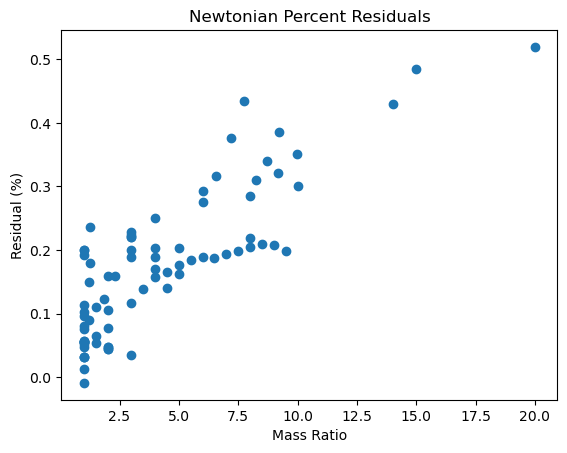

In [7]:
def Newtonian_CHT(X):
    #tau is orbital period, q is mass_ratio, A is scaling constant based on fundamental mathematical and physical constants with G = C = 1
    A = 5/(16*np.pi)**(8/3)
    tau, q = X
    return A*tau**(8/3)*(q+1)**2/q

Newt_Per_Residual = (Newtonian_CHT([ref_orb_period, df_3["reference_mass_ratio"]]) - CHT)/CHT

In [8]:
default_pysr_params = dict(
    populations = 30,
    model_selection="best",
)

best_avg_error = 10

In [13]:
model = PySRRegressor(
    niterations=30,
    binary_operators=["+", "*", "-"],
    unary_operators=["square", "cube", "sqrt", "cbrt", "inv(x) = 1/x"], #"cube_root(x) = cbrt(x)"
    extra_sympy_mappings={"inv": lambda x: 1/x}, #"square": lambda x: x**2, "cube_root": lambda x: x**(1/3)
    **default_pysr_params,
    #elementwise_loss="loss(prediction, target) = ((prediction - target)/target)^2"
    # ^ Custom loss function (julia syntax)
)

In [16]:
num = 100

for i in range(num):
    model.fit(init_param, Newt_Per_Residual)
    CHT_pred = model.predict(init_param)
    current_avg_error = (abs(CHT_pred - Newt_Per_Residual)*100).mean() #How much percent error is not removed, so this should be equivalent to MSE for total
    #corrected model
    
    print("Current Prediction Average Error (%):", current_avg_error)
    print("Best Prediction Average Error (%):", best_avg_error)
    print("Current Model Formula:", model.sympy())
    plt.scatter(df_3["reference_mass_ratio"], (Newt_Per_Residual - CHT_pred)*100, marker = ".", label = "PySR")
    plt.xlabel("Mass ratio")
    plt.ylabel("Error in CHT (%)")
    plt.title("Percent Residuals")
    
    if current_avg_error < best_avg_error:
        best_avg_error = current_avg_error
        best_model = model.equations_
        plt.savefig(f"best_model_{round(best_avg_error, 3)}.png")
        with open(f'best_model_{round(best_avg_error, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
            pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
    elif current_avg_error < 1.5*best_avg_error:
        plt.savefig(f"good_model_{round(current_avg_error, 3)}.png")
        with open(f'good_model_{round(current_avg_error, 3)}.pk', 'wb') as good_model_file:
            pickle.dump(model, good_model_file)

    plt.close()

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.227e-02  y = cbrt(square(x₁ * 0.018901))
7           1.107e-03  6.088e-01  y = (inv(x₀) * 44.143) * cbrt(x₁)
9           3.748e-04  5.416e-01  y = (inv(x₀) * (cbrt(x₁) * 56.432)) + -0.063234
11          1.456e-04  4.727e-01  y = ((inv(x₀) * 59.512) * cbrt(x₁ + 1.5734)) + -0.1126
13          1.387e-04  2.425e-02  y = ((cbrt(x₁ - -1.483) * 57.612) * inv(x₀ - 8.0069)) + -0...
                                      .10842
18          9.933e-05  6.678e-02  y = ((inv(x₀) * cbrt(59.147 * (inv(x₀ * 0.27202) * (0.6426...
                                      4 + x₁)))) * 59.147) + -0.053988
21          9.543e-05  1.335e-02  y = ((inv(x₀) * 55.293) * cbrt(inv(0.4396 * x₀) * ((x₁

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121531_56mYO6/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.241e-03  2.834e-01  y = sqrt(x₁) * 0.090659
5           3.770e-03  1.177e-01  y = 0.065183 - (x₁ * -0.025812)
6           3.741e-03  7.686e-03  y = cbrt(x₁ * x₁) * 0.070941
7           9.451e-04  1.376e+00  y = (inv(x₀) * 32.505) * sqrt(x₁)
9           8.534e-04  5.103e-02  y = (inv(x₀) * sqrt(x₁ + 0.82287)) * 30.35
10          5.826e-04  3.817e-01  y = ((cbrt(x₁) + 3.9598) * cbrt(inv(x₀))) + -0.58351
11          2.363e-04  9.022e-01  y = cube(((cbrt(x₁) + 5.525) * cbrt(inv(x₀))) + -0.44983)
13          1.204e-04  3.370e-01  y = cube((inv(cbrt(x₁ + x₀)) * (cbrt(x₁) + 5.6488)) + -0.4...
                                      5665)
15          1.111e-04  4.043e-02  y = cube((cbrt(inv(x₀ 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6637524729886686
Best Prediction Average Error (%): 0.6162949670500192
Current Model Formula: ((Abs(x1)**(1/3)*sign(x1) + 5.6487546)/(Abs(x0 + x1)**(1/3)*sign(x0 + x1)) - 0.45665458)**3


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121536_ondUhn/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * 150.45)
7           9.451e-04  6.867e-01  y = inv(x₀) * (sqrt(x₁) * 32.505)
9           7.396e-04  1.225e-01  y = inv(x₀ + -57.605) * sqrt(x₁ * 710.34)
11          6.861e-04  3.757e-02  y = sqrt((x₁ + 0.4676) * 710.34) * inv(x₀ + -57.605)
12          5.627e-04  1.982e-01  y = square(square(sqrt(inv(x₀) * (cbrt(x₁) * 43.023)) + 0....
                                      20909))
13          4.827e-04  1.534e-01  y = sqrt(inv(x₀) * (sqrt(inv(x₀) * x₁) * 342.73)) + -0.126...
                                      48
14          3.786e-04  2.430e-01  y = inv(x₀) * sqrt(919.29 * (x₁ + inv(cube

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.8107566170127285
Best Prediction Average Error (%): 0.6162949670500192
Current Model Formula: (6.75419403037846*sqrt((sqrt(x1) + Abs(sqrt(x0))**(1/3)*sign(sqrt(x0)))/x0) - 0.35233936)**2


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121542_nU7QdJ/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁ * 0.018895))
6           3.479e-03  7.258e-02  y = (inv(x₀) + -0.0014683) * 139.03
7           9.451e-04  1.303e+00  y = (inv(x₀) * 32.505) * sqrt(x₁)
9           9.440e-04  5.528e-04  y = inv(x₀ - 0.27429) * (32.505 * sqrt(x₁))
10          9.367e-04  7.788e-03  y = (inv(x₀ - inv(0.27429)) * 32.505) * sqrt(x₁)
11          8.028e-04  1.542e-01  y = (((x₁ * sqrt(x₁)) + 101.57) * inv(x₀)) + -0.13671
12          2.073e-04  1.354e+00  y = -0.3571 + (inv(cbrt(x₀) - (cbrt(x₁) + 1.0103)) * 2.432...
                                      1)
14          2.073e-04  1.015e-04  y = (inv(cbrt(x₀ + -0.08339

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 1.0264783351579279
Best Prediction Average Error (%): 0.6162949670500192
Current Model Formula: -0.35709503 + 2.4321358/(Abs(x0)**(1/3)*sign(x0) - Abs(x1)**(1/3)*sign(x1) - 1.0102869)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121547_labNtz/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034505
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁)) * 0.070941
7           9.451e-04  6.879e-01  y = (inv(x₀) * 32.505) * sqrt(x₁)
9           8.515e-04  5.213e-02  y = (inv(x₀) * 30.988) * sqrt(x₁ + 0.68949)
10          6.177e-04  3.209e-01  y = ((x₁ + 14.509) * square(cbrt(inv(x₀)))) - 0.19421
11          4.147e-04  3.985e-01  y = -0.59259 - ((x₁ + 43.175) * (cbrt(inv(x₀)) * -0.11639)...
                                      )
12          3.235e-04  2.485e-01  y = (cube(inv(cbrt(x₀))) * ((x₁ * 4.9984) + 84.625)) - 0.1...
                                      1978
14          2.472e-04  1.345e-01  y = (((x₁ * 11.061) + 6.484) * square(cbrt(inv(x₁ * x₀))))...
                              

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121557_RTsxTM/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034505
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁) * 0.26634)
7           8.150e-04  7.620e-01  y = sqrt(inv(x₀ + -207.83) * x₁)
9           5.109e-04  2.335e-01  y = sqrt(inv(x₁ + (-219.56 + x₀)) * x₁)
12          2.190e-04  2.824e-01  y = sqrt(x₁ + 1.771) * (inv(sqrt(x₀) + -10.101) - 0.042499...
                                      )
14          2.018e-04  4.101e-02  y = (inv(sqrt(x₀ + 0.36138) + -9.9574) - 0.045789) * (sqrt...
                                      (x₁) + 0.60614)
15          1.255e-04  4.751e-01  y = (cbrt(x₁) + sqrt(1.6098 + x₁)) * (inv(-7.9188 + sqrt(x...
                                      ₀)) - 0.046388)
16          1.254e-04  4.292e-05  y = (sqrt(x₁ + square(1.2

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121603_P0J3JM/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034502
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * 150.45)
6           3.596e-03  3.700e-02  y = (inv(x₀) - 0.001312) * 123.59
7           9.451e-04  1.336e+00  y = inv(x₀) * sqrt(x₁ * 1054.6)
9           5.414e-04  2.785e-01  y = square((inv(x₀) * cbrt(cbrt(x₁))) * 129.38)
11          3.004e-04  2.945e-01  y = square(inv(x₀) * (cbrt(cbrt(x₁ + -1.5583)) * 132.72))
14          2.211e-04  1.022e-01  y = sqrt(((inv(x₀) * (x₁ * 1742.7)) + 50.082) * inv(x₀)) -...
                                       0.26576
16          2.111e-04  2.307e-02  y = sqrt(((inv(x₁ + x₀) * (x₁ * 1741)) + 50.082) * inv(x₀)...
                                      )

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.5760321984212409
Best Prediction Average Error (%): 0.5157951559137864
Current Model Formula: sqrt((65.87992 + 0.11035639*x1*(2.8396194*x1 - 2.8396194*Abs(x0)**(1/3)*sign(x0) - 138.80812)**2/x0)**2/x0**2) - 0.08332679


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121608_kAAQkE/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096386
5           3.741e-03  9.228e-02  y = square(cbrt(x₁ * -0.018896))
7           8.150e-04  7.620e-01  y = sqrt(x₁ * inv(x₀ + -207.83))
9           6.921e-04  8.172e-02  y = sqrt((x₁ + 0.60526) * inv(x₀ + -207.83))
10          6.745e-04  2.581e-02  y = inv(sqrt(-207.83 + x₀)) * sqrt(x₁ + 0.44919)
11          4.922e-04  3.151e-01  y = cube(inv(((cbrt(x₀) + inv(x₁)) * 0.51365) + -2.0059))
13          2.521e-04  3.345e-01  y = inv(cube((cbrt(x₀) * 0.4834) + (inv(x₁ + 0.74916) + -1...
                                      .8727)))
14          1.958e-04  2.525e-01  y = inv(cube((inv(inv(x₁) + x₁) + -1.8737) + (cbrt(x₀) * 0...
                      

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121614_cGCs71/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁)) * 0.070941
7           9.451e-04  6.879e-01  y = (inv(x₀) * 32.505) * sqrt(x₁)
8           8.762e-04  7.564e-02  y = ((x₀ * -0.00031893) + 0.2073) * sqrt(x₁)
9           6.573e-04  2.874e-01  y = sqrt(x₁) * inv((x₀ * 0.045575) + -4.5039)
11          3.772e-04  2.777e-01  y = sqrt(x₁ + 0.84342) * inv((x₀ * 0.049617) + -5.183)
14          1.813e-04  2.443e-01  y = sqrt(inv(x₀) * (inv(x₀) * ((x₁ - -4.6659) * 1201.7))) ...
                                      - 0.10862
16          1.706e-04  3.028e-02  y = sqrt((inv(x₁ + x₀) * inv(x₀)) * (1356.5 * (x₁ - -4.16)...
                                      )) - 0.11483
18          1.681e-04  7.481

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121619_fAFoAF/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096383
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.04) - 0.20417
7           9.451e-04  1.303e+00  y = (inv(x₀) * 32.505) * sqrt(x₁)
8           1.796e-04  1.660e+00  y = cbrt(x₁) * (inv(square(x₀)) * 13788)
10          1.317e-04  1.553e-01  y = (cbrt(x₁) * square(inv(-37.86 - x₀))) * 17524
12          1.038e-04  1.190e-01  y = ((cbrt(x₁) * inv(square(x₀ + 63.439))) * 21332) - 0.01...
                                      298
14          9.910e-05  2.301e-02  y = (inv(square((x₁ * 2.7226) + x₀)) * sqrt(x₁ + 0.48586))...
                                       * 11166
15          9.910e-05  2.152e-05  y = (11166 * sqrt(x₁ + inv(2.0

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121625_y1wXjX/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁ * 0.0092904)
5           3.741e-03  9.228e-02  y = square(cbrt(x₁ * -0.018896))
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.03) + -0.20415
7           9.451e-04  1.303e+00  y = (sqrt(x₁) * 32.505) * inv(x₀)
9           7.613e-04  1.081e-01  y = sqrt(x₁ * 750.71) * inv(x₀ + -50.86)
11          1.818e-04  7.161e-01  y = ((inv(x₀) * 35.426) * sqrt(x₁ - -4.1946)) - 0.10684
15          1.669e-04  2.140e-02  y = (inv((cbrt(x₀ * 0.21724) + sqrt(inv(x₁))) + -3.3614) *...
                                       0.45345) - 0.13578
17          1.653e-04  4.567e-03  y = (inv((inv(sqrt(x₁)) + -3.3379) + cbrt((x₀ * 0.23196) -...
                                       3.7623)) * 0.46831) - 0.13623
18          1

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121631_dhYRMK/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * 150.45)
7           9.451e-04  6.867e-01  y = inv(x₀) * sqrt(x₁ * 1056.6)
9           1.032e-04  1.107e+00  y = ((75.137 * inv(x₀)) - 0.095023) * cbrt(x₁)
11          1.032e-04  4.470e-07  y = ((inv(x₀) * 75.137) - 0.095023) * square(cbrt(sqrt(x₁)...
                                      ))
19          1.020e-04  1.432e-03  y = cube(sqrt(sqrt(((219.42 * inv(x₀)) - 0.28574) * sqrt((...
                                      x₁ - -0.32596) * inv(x₀ * 0.12645)))))
21          1.017e-04  1.455e-03  y = sqrt(sqrt(cube(sqrt((x₁ - -0.32596) * inv((x₀ * 0.1264...
                                 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6162896812912281
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (-0.09502266 + 75.13727/x0)*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250702_121636_xVtMat/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096386
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.03) + -0.20415
7           9.451e-04  1.303e+00  y = sqrt(x₁ * 1056.6) * inv(x₀)
9           8.404e-04  5.869e-02  y = (sqrt(x₁ + 0.63321) * inv(x₀)) * 30.602
10          3.747e-04  8.076e-01  y = ((inv(x₀) * (-19.464 - x₁)) + 0.030412) * -4.8645
12          1.702e-04  3.947e-01  y = ((inv(x₀) * (-5.0116 - cbrt(square(x₁)))) * -13.789) +...
                                       -0.11125
14          1.393e-04  1.000e-01  y = (-3.9372 - x₁) * ((cbrt(square(x₁)) + -15.464) * (inv(...
                                      x₀) + -0.

[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7352086801524128
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: sqrt((-x1 - 6.952578)**3*(Abs(x1)**(2/3)*sign(x1)**2 - 13.920121)**3/x0**3) - 0.03439197
  - outputs/20250702_121641_GS9D5B/hall_of_fame.csv


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.121e-03  3.121e-01  y = sqrt(x₁ * 0.008893)
5           3.732e-03  9.914e-02  y = square(inv(x₀) * 150.45)
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.03) - 0.20415
7           9.451e-04  1.303e+00  y = inv(x₀) * sqrt(x₁ * 1056.6)
8           1.796e-04  1.660e+00  y = cbrt(x₁) * square(inv(x₀) * -117.42)
9           1.032e-04  5.544e-01  y = ((inv(x₀) * 75.139) - 0.095027) * cbrt(x₁)
11          1.013e-04  9.176e-03  y = ((inv(x₀ + -9.6938) * 71.079) - 0.089528) * cbrt(x₁)
13          1.004e-04  4.443e-03  y = (-0.036201 + cbrt(x₁)) * ((inv(x₀ - 1.9576) * 75.143) ...
                                      - 0.093422)
14          9.456e-05  6.000e-02  y = cbrt(x₁) * ((inv(inv(x₁ + -2.7434) + x₀) * 75.139) - 0...
                

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121647_OsYufY/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22637
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.03) + -0.20415
7           9.451e-04  1.303e+00  y = inv(x₀) * sqrt(x₁ * 1056.5)
9           6.582e-04  1.808e-01  y = inv(x₀ + -97.004) * sqrt(x₁ * 488.47)
10          1.796e-04  1.299e+00  y = square(117.42 * inv(cbrt(x₁) * x₀)) * x₁
12          1.317e-04  1.553e-01  y = square(inv((-34.664 - x₀) * cbrt(x₁)) * 131.09) * x₁
14          1.124e-04  7.914e-02  y = x₁ * square(inv((cbrt(x₁) * (x₁ + x₀)) + 35.657) * 128...
                                      .73)
16          1.122e-04  8.944e-04  y = square(128.73 * inv((((x₀ + 0.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121652_Svp794/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.03) + -0.20415
7           3.029e-03  1.384e-01  y = cbrt(inv(x₀) * (x₁ + -0.7945))
8           7.005e-04  1.464e+00  y = (x₀ + -621.88) * (cbrt(x₁) * -0.0004793)
9           2.721e-04  9.457e-01  y = cube(sqrt(inv(x₀) * 85.441)) * cbrt(x₁)
11          1.146e-04  4.323e-01  y = (cbrt(x₁) * cube(sqrt(inv(x₀) * 91.393))) - 0.025359
13          1.146e-04  1.682e-04  y = (cbrt(x₁) * cube(sqrt(inv(x₀ - 0.27928) * 91.393))) - ...
                                      0.02536
14          1.128e-04  1.586e-02  y = (cbrt(x₁) * sqrt(cube(

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6939932980186859
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: 873.714283713887*(1/x0)**(3/2)*Abs(x1)**(1/3)*sign(x1) - 0.025359446


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121657_tt7dsN/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17397
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁) * -0.26634)
7           9.452e-04  6.879e-01  y = sqrt(x₁) * inv(x₀ * 0.030823)
8           8.762e-04  7.580e-02  y = ((x₀ * -0.00031895) - -0.2073) * sqrt(x₁)
9           6.847e-04  2.466e-01  y = sqrt(x₁) * inv((x₀ * 0.041521) - 3.2432)
10          2.721e-04  9.230e-01  y = cbrt(x₁) * (inv(sqrt(x₀) * x₀) * 789.78)
12          1.980e-04  1.590e-01  y = inv(-0.62367 + (x₀ * (sqrt(x₀) * 0.0013856))) * cbrt(x...
                                      ₁)
14          1.965e-04  3.676e-03  y = cbrt(x₁) * inv(((x₀ + -1.3349) * (sqrt(x₀) * 0.0013856...
                                      )) + -

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121702_ahwFpT/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.770e-03  8.459e-02  y = (x₁ * 0.025812) - -0.065183
7           1.010e-03  6.585e-01  y = inv(x₀ * 0.032019) * sqrt(x₁)
8           6.991e-04  3.680e-01  y = ((x₀ * -0.00047183) + 0.29563) * cbrt(x₁)
9           6.166e-04  1.255e-01  y = cbrt(x₁) * inv((x₀ * 0.028363) + -1.8658)
10          1.914e-04  1.170e+00  y = cbrt(x₁) * (cbrt(inv(x₀ * 0.012393)) + -0.48797)
12          1.167e-04  2.476e-01  y = cbrt(x₁) * (cbrt(inv((x₀ * 0.042614) + -4.1676)) + -0....
                                      33207)
14          1.166e-04  3.425e-04  y = (-0.33207 + inv(cbrt(((x₀ + 0.32512) * 0.042614) + -4....
                                 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Model Formula: (-0.33206862 + sign(1/(0.04261414*x0 - 4.167619))/Abs(0.04261414*x0 - 4.167619)**(1/3))*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250702_121707_rqtrfu/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁)) * 0.070941
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.03) + -0.20415
7           9.451e-04  1.303e+00  y = (inv(x₀) * sqrt(x₁)) * 32.505
9           8.740e-04  3.909e-02  y = cube((cbrt(x₁) + 2.4598) * cbrt(inv(x₀)))
10          5.826e-04  4.056e-01  y = ((cbrt(x₁) + 3.9598) * cbrt(inv(x₀))) + -0.5835
11          2.230e-04  9.602e-01  y = ((inv(x₀) * 32.986) * sqrt(x₁ + 5.2663)) + -0.10407
12          2.228e-04  1.116e-03  y = sqrt(cube(((cbrt(x₁) + 6.0337) * inv(cbrt(x₀))) + -0.7...
                                      4642))
13          1.801e-04  2.126e-01  y = cube((inv(cb

[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6961305424787639
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (2**(2/3)*(Abs(x1 - 0.573057)**(1/3)*sign(x1 - 0.573057) + 7.420499)/(2*Abs(x0)**(1/3)*sign(x0)) - 0.43656275)**3


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121713_SAwReT/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.118e-03  3.129e-01  y = sqrt(x₁ * 0.0089299)
5           3.732e-03  9.835e-02  y = square(inv(x₀) * 150.45)
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.04) + -0.20416
7           2.048e-03  5.298e-01  y = sqrt(x₁ * inv(x₀ * 0.30901))
8           1.073e-03  6.464e-01  y = inv(x₀ * 0.16583) * (x₁ - -6.2695)
10          4.122e-04  4.784e-01  y = (x₁ - -9.1132) * (inv(x₀ * 0.12909) - 0.0086681)
12          3.897e-04  2.802e-02  y = inv(square(cbrt(sqrt(x₀ * 0.057327) - cbrt(x₁)))) - 0....
                                      30943
14          2.229e-04  2.793e-01  y = 1.5186 * (cbrt(inv(square(sqrt(x₀ * 0.081128) - cbrt(x...
                                      ₁)))) - 0.29028)
16          2.133e-04  2.194e-02  y = sqrt(square(1

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121718_UtO7rz/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁ * 0.018895))
7           2.048e-03  3.012e-01  y = sqrt((x₁ * 3.2366) * inv(x₀))
8           6.227e-04  1.191e+00  y = sqrt(x₁ * cube(inv(x₀))) * 572.24
9           2.721e-04  8.280e-01  y = (cbrt(x₁) * 789.77) * inv(cube(sqrt(x₀)))
11          1.785e-04  2.108e-01  y = cbrt(x₁) * (667.36 * cube(inv(sqrt(x₀ - 32.941))))
13          1.586e-04  5.900e-02  y = (cbrt(x₁) * sqrt(inv(cube((x₀ + -28.185) - 28.155)))) ...
                                      * 578.96
18          1.363e-04  3.036e-02  y = sqrt(inv(cube(0.015349 * x₀) * (cbrt((0.56438 + x₁) * ...
                                   

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6757602183423306
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: 5651.21244279542*sqrt(x1/(x0**3*Abs((x0 + 3.2982624*x1)**2*(x1 + 0.95728517))**(1/3)*sign((x0 + 3.2982624*x1)**2*(x1 + 0.95728517))))


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121723_Q6YTRZ/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034506
4           4.103e-03  3.165e-01  y = sqrt(x₁ * 0.0092904)
5           3.741e-03  9.228e-02  y = square(cbrt(x₁ * 0.018894))
7           2.980e-03  1.137e-01  y = cbrt(inv(x₀) * x₁) - 0.034327
8           1.741e-03  5.375e-01  y = inv(cbrt(square(x₀))) * (x₁ + 4.7636)
9           4.584e-04  1.334e+00  y = cbrt(x₁ * square(square(inv(x₀) * 72.602)))
10          4.429e-04  3.459e-02  y = square(square(cbrt((inv(x₀) * -62.194) * cbrt(x₁))))
12          4.372e-04  6.384e-03  y = cbrt(x₁) * cbrt(square(square(inv(x₀ - 4.0726) * 71.67...
                                      4)))
13          1.698e-04  9.457e-01  y = cbrt(x₁ * inv(square(square(x₀ * -0.063937) * 0.039363...
                                      ))) + -0.029366
14          1.362e-04  2.204

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250702_121729_vKXCum/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁)) * 0.070941
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.03) + -0.20415
7           9.451e-04  1.303e+00  y = inv(x₀) * sqrt(1056.5 * x₁)
8           6.991e-04  3.015e-01  y = cbrt(x₁) * ((x₀ * -0.00047184) + 0.29563)
10          3.240e-04  3.846e-01  y = (((x₁ * 5.092) + 81.844) * inv(x₀)) + -0.11345
13          2.440e-04  9.446e-02  y = (((sqrt(x₁ + -0.89479) * 19.36) + 69.464) * inv(x₀)) +...
                                       -0.10229
15          1.697e-04  1.817e-01  y = (inv(x₀) * (69.247 - ((inv(x₁ + 9.622) * x₁) * -128.65...
                                      ))) + 

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


  - outputs/20250702_121734_VZVGyw/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁) * 0.26634)
7           9.451e-04  6.879e-01  y = (inv(x₀) * sqrt(x₁)) * 32.505
9           6.650e-04  1.757e-01  y = inv(x₀ + -89.274) * sqrt(x₁ * 529.76)
11          1.792e-04  6.556e-01  y = sqrt((x₁ + 1.8614) * 1841.7) * (inv(x₀) + -0.0011031)
13          1.572e-04  6.549e-02  y = (sqrt((x₁ + 1.4656) * 1841.7) * 1.0889) * (inv(x₀) + -...
                                      0.0011913)
15          1.539e-04  1.074e-02  y = (inv(x₀ + 0.69871) + -0.0011811) * sqrt(((x₁ + 1.545) ...
                                      - -0.19681) * 2075.9)
20          1.449e-04  1.206e-02  y = sqrt(sqrt

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121739_HrVbC6/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
7           9.451e-04  6.867e-01  y = inv(x₀) * (sqrt(x₁) * 32.505)
9           6.587e-04  1.805e-01  y = (x₁ + 11.322) * (inv(square(x₀)) * 1334.5)
11          1.032e-04  9.269e-01  y = cbrt(x₁ * 160.55) * ((inv(x₀) * 13.825) + -0.017484)
13          1.013e-04  8.932e-03  y = -0.0057897 - (cbrt(x₁ * -488.63) * ((inv(x₀) * 9.4273)...
                                       + -0.011283))
15          1.004e-04  4.912e-03  y = ((cube(cbrt(inv(x₀))) * 0.25615) + -0.00032017) * ((cb...
                                      rt(x₁) * 301.38) + -18.346)
22          9.980e-05  8.005e-04  y 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121743_lfqR9h/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.03) - 0.20415
7           1.107e-03  1.145e+00  y = cbrt(x₁) * (inv(x₀) * 44.145)
8           3.117e-04  1.267e+00  y = square(inv(x₀ * 0.0087622)) * cbrt(x₁)
10          1.797e-04  2.755e-01  y = inv(square(x₀ * 0.011491)) * cbrt(x₁ * 6.0576)
12          1.412e-04  1.206e-01  y = square(cbrt(sqrt(x₁) * cbrt(x₀)) * inv(x₀ * -0.016063)...
                                      )
13          1.412e-04  1.169e-04  y = (cbrt(x₁) * cbrt(square(cbrt(x₀)))) * inv(square(x₀ * ...
                                      -0.01606))
14         

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.8970748297942308
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: 13806.1175670537*Abs(x1)**(1/3)*sign(x1)/x0**2


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250702_121748_WeVKqS/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22637
7           3.010e-03  1.075e-01  y = square(inv(x₁ - x₀)) * 21930
8           1.796e-04  2.819e+00  y = (cbrt(x₁) * 13788) * inv(square(x₀))
10          1.316e-04  1.556e-01  y = inv(0.53196 + square(x₀ * 0.00815)) * cbrt(x₁)
13          1.271e-04  1.164e-02  y = inv(square(0.0081993 * x₀) + inv(0.0081993 * x₀)) * cb...
                                      rt(x₁)
14          1.222e-04  3.897e-02  y = inv(square(0.0081993 * x₀) + square(inv(x₀ * 0.00544))...
                                      ) * cbrt(x₁)
16          1.187e-04  1.453e-02  y = cbrt(x₁) * inv(inv(square((x₁ - x₀

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121753_146rXq/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.770e-03  8.459e-02  y = (x₁ + 2.5248) * 0.025813
6           3.479e-03  8.027e-02  y = (inv(x₀) * 139.04) + -0.20416
7           8.240e-04  1.440e+00  y = sqrt(x₁ * inv(x₀ + -205.76))
9           1.032e-04  1.039e+00  y = ((inv(x₀) * 75.138) - 0.095026) * cbrt(x₁)
11          1.014e-04  8.535e-03  y = ((inv(x₀) + -0.0011848) * (cbrt(x₁) * 73.929)) - 0.006...
                                      3154
12          1.012e-04  2.515e-03  y = (inv(cbrt(x₀ + -147.55)) + -0.11474) * (cbrt(x₁) * 2.1...
                                      254)
14          9.671e-05  2.258e-02  y = (cbrt(x₁) * ((cbrt(inv(x₀ + -147.55)) - 0.11153) * 2.0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6162965329032627
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (-0.09502569 + 75.138275/x0)*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121758_duXiba/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096386
5           3.741e-03  9.228e-02  y = cbrt(square(x₁)) * 0.070941
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.03) + -0.20415
7           8.150e-04  1.451e+00  y = sqrt(x₁ * inv(x₀ + -207.83))
8           1.796e-04  1.512e+00  y = cbrt(x₁) * (square(inv(x₀)) * 13788)
9           1.032e-04  5.544e-01  y = (inv(x₀) + -0.0012647) * (cbrt(x₁) * 75.137)
11          1.020e-04  5.964e-03  y = cbrt(x₁) * ((inv(x₀ + -6.0057) * 72.627) + -0.091667)
12          1.016e-04  3.508e-03  y = cbrt(x₁) * ((inv(x₀ - cbrt(x₁)) * 74.164) + -0.093417)
16          9.613e-05  1.383e-02  y = cbrt(x₁) * ((inv(x₀ + cbrt((-0.046508 - x₁) + 3.5887))...
         

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121804_XC2Cci/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁ * -0.018896))
7           3.704e-03  4.908e-03  y = square(cbrt(x₁ + 0.24468) * -0.26234)
8           9.438e-04  1.367e+00  y = sqrt(x₁) * square(inv(x₀ * 0.0099227))
10          3.300e-04  5.254e-01  y = sqrt(x₁ + 1.7471) * square(inv(x₀ * 0.010733))
12          1.553e-04  3.769e-01  y = (sqrt(x₁) + 0.62544) * square(inv((x₀ + x₁) * 0.010829...
                                      ))
14          1.306e-04  8.663e-02  y = (sqrt(x₁) + 0.58035) * square(inv((x₀ + (x₁ * 1.4445))...
                                       * 0.010671))
16          1.297e-04  3.306e-03  y = ((sqrt(x₁) + 0.57491) *

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Model Formula: sqrt(x1 + 0.65057814)/(0.00959775288094585*x0 - 0.00195664411905415*x1 + 0.011554397*((Abs(x1)**(1/3)*sign(x1) + 0.14382952)**2 - Abs(x1)**(1/3)*sign(x1) + 0.93165183)**2 + 0.05973043)**2


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121809_3OzgCO/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁)) * 0.070936
7           1.423e-03  4.834e-01  y = sqrt(x₁ * inv(x₀ - 186.89))
8           8.150e-04  5.571e-01  y = sqrt(inv(x₀ - 207.83)) * sqrt(x₁)
10          6.390e-04  1.216e-01  y = (sqrt(x₁ + 21.033) * cbrt(inv(x₀))) - 0.52238
12          3.204e-04  3.451e-01  y = (inv(cbrt(x₀ + -66.819)) * sqrt(x₁ + 14.273)) - 0.4644...
                                      9
17          2.766e-04  2.946e-02  y = ((sqrt((cbrt(x₀) + x₁) - -1.0551) * inv(cbrt(x₀ - 181....
                                      32))) - 0.37823) * 0.69446
19          2.761e-04  7.950e-04  y = ((sqrt(((0.034179 + cbrt(x

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121814_eQghEF/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.460e-02  y = inv(square(x₀ * 0.0066368))
7           3.029e-03  1.043e-01  y = cbrt((x₁ - 0.79457) * inv(x₀))
8           7.208e-04  1.436e+00  y = (0.29038 - (x₀ * 0.00046545)) * cbrt(x₁)
9           2.276e-04  1.153e+00  y = cbrt(x₁) * square(inv(cbrt(x₀) + -4.1243))
10          2.276e-04  5.960e-08  y = square(cbrt(sqrt(x₁)) * inv(-4.1243 + cbrt(x₀)))
11          1.516e-04  4.061e-01  y = (square(inv(cbrt(x₀) + -4.1917)) * cbrt(x₁)) + -0.0143...
                                      88
12          1.408e-04  7.428e-02  y = 0.017229 * ((square(-9.7673 + cbrt(x₀)) * cbrt(x₁)) - ...
                                      0.64375)
13          1.314e-04  6.892e-02  y = (

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.5615855797867038
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: -0.18703268 + 1/(-3.7644868*Abs(x1)**(1/9)*Abs(sign(x1))**(1/3)*sign(Abs(x1)**(1/3)*sign(x1)) + Abs(x0 + (Abs(x1)**(2/3)*sign(x1)**2 - 1.2310051)**2)**(1/3)*sign(x0 + (Abs(x1)**(2/3)*sign(x1)**2 - 1.2310051)**2))


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121824_ubBbu2/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * -150.46)
7           9.451e-04  6.867e-01  y = (inv(x₀) * sqrt(x₁)) * 32.505
8           1.796e-04  1.660e+00  y = cbrt(x₁) * square(-117.42 * inv(x₀))
9           1.796e-04  1.132e-06  y = square((cbrt(sqrt(x₁)) * -117.42) * inv(x₀))
11          1.316e-04  1.556e-01  y = square(inv(-36.763 - x₀) * (-131.95 * cbrt(sqrt(x₁))))
13          1.024e-04  1.253e-01  y = square((inv(x₀ - -82.16) * cbrt(sqrt(x₁))) * -154.85) ...
                                      - 0.017337
16          1.024e-04  1.205e-04  y = square((inv((x₀ - cube(0.83116)) - -82.417) * -154.83)...
                                       * cbrt(sqrt(x₁))) - 0.017576
17       

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.8638665094707039
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: 21242.83*(x1**(1/4) - 0.37338218)/x0**2


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250702_121835_hUsxLI/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.770e-03  8.459e-02  y = (x₁ + 2.5251) * 0.025813
6           3.479e-03  8.027e-02  y = (inv(x₀) * 139.03) - 0.20414
7           9.451e-04  1.303e+00  y = sqrt(x₁ * 1056.6) * inv(x₀)
8           6.991e-04  3.015e-01  y = (0.29563 - (x₀ * 0.00047183)) * cbrt(x₁)
9           5.086e-04  3.182e-01  y = inv(-2.4348 - (x₀ * -0.03036)) * cbrt(x₁)
10          4.949e-04  2.713e-02  y = inv(inv(-0.39216) - (-0.03036 * x₀)) * cbrt(x₁)
11          1.631e-04  1.110e+00  y = cbrt(x₁) * (-0.026806 - inv((-0.026806 * x₀) + 2.4134)...
                                      )
13          1.490e-04  4.523e-02  y = -0.021746 - (cube(cbrt(inv((x₀ * -

[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.9329664557574328
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (-0.02680642 - 1/(2.4134314 - 0.02680642*x0))*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121841_G3WO0a/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁ * 0.018895))
7           8.150e-04  7.620e-01  y = sqrt(inv(x₀ + -207.84) * x₁)
9           7.010e-04  7.531e-02  y = sqrt(inv(x₀ + -204.35) * (x₁ + 0.22036))
10          6.412e-04  8.926e-02  y = cube(inv(sqrt(sqrt(x₀)) + -2.072)) * sqrt(x₁)
12          2.369e-04  4.978e-01  y = cbrt(x₁) * (sqrt(inv(x₀ + -193.12) * 4.6047) - 0.05844...
                                      7)
14          1.422e-04  2.551e-01  y = (cbrt((x₁ + 1.2954) * 10.422) * sqrt(inv(x₀ + -173.87)...
                                      )) - 0.10599
18          1.395e-04  4.788e-03  y = (sqrt(inv(x₀ + -173.79)) * cbrt

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Model Formula: 0.42095616*x0**2*sqrt(x1 + 1.2734466)/((sqrt(x0) - 7.283688)**3*(x0 + sqrt(x1**3))) - 0.040974855


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121846_cp6QAR/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.02) + -0.2041
7           9.451e-04  1.303e+00  y = (sqrt(x₁) * 32.505) * inv(x₀)
8           1.796e-04  1.660e+00  y = inv(square(x₀)) * (13788 * cbrt(x₁))
9           1.050e-04  5.365e-01  y = (76.504 * (inv(x₀) + -0.0012943)) * cbrt(x₁)
11          1.032e-04  8.935e-03  y = (cbrt(x₁) * ((x₀ + -790.57) * -0.095055)) * inv(x₀)
13          1.001e-04  1.491e-02  y = (x₀ + -796.28) * (((inv(x₀) * cbrt(x₁)) + -0.00012134)...
                                       * -0.096043)
15          1.001e-04  2.086e-07  y = ((x₀ + -795.9) - 0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121851_eNFu3h/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁ * 0.018897))
7           9.265e-04  6.978e-01  y = sqrt(x₁ * inv(x₀ + -200.02))
9           6.601e-04  1.695e-01  y = cbrt(inv(x₀ + -194.59) * x₁) + -0.10661
11          5.218e-04  1.176e-01  y = -0.11235 + cbrt(x₁ * inv(x₁ + (x₀ + -208.32)))
13          4.521e-04  7.161e-02  y = cbrt(x₁ * inv((x₁ + x₁) + (x₀ + -217.21))) + -0.11473
15          4.360e-04  1.813e-02  y = cbrt((x₁ + 0.032343) * inv(x₁ + (x₁ + (x₀ + -217.21)))...
                                      ) + -0.11473
16          3.896e-04  1.126e-01  y = cube(inv(square(((sqrt(x₀ - x₁) + (inv(x₁) * 5.3589)) ...
                  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.8192603802053914
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (0.042739004*sqrt(x0 + x0/(x1 + 0.521944368037588/x1) - x1) + 0.43712315)**(-6)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121856_UVO79D/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * 150.45)
6           3.479e-03  7.017e-02  y = -0.20415 - (inv(x₀) * -139.03)
7           2.979e-03  1.551e-01  y = cbrt(x₁ * inv(x₀)) + -0.035074
8           2.048e-03  3.747e-01  y = inv(sqrt(inv(x₁ * 3.2366) * x₀))
9           1.583e-03  2.577e-01  y = sqrt(x₁) * (cbrt(square(inv(x₀))) * 4.7362)
10          4.204e-04  1.326e+00  y = inv(square(inv(sqrt(cbrt(x₁))) * (x₀ * -0.0088536)))
11          1.796e-04  8.505e-01  y = square((inv(x₀) * 117.42) * inv(sqrt(inv(cbrt(x₁)))))
12          1.796e-04  1.967e-06  y = square(244.52 * inv((x₀ * 2.0824) * sqrt(inv(cbrt(x₁))...
                

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121902_XGpzRE/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.770e-03  8.459e-02  y = (x₁ * 0.025812) - -0.065183
7           8.150e-04  7.658e-01  y = sqrt(x₁ * inv(x₀ + -207.84))
9           6.957e-04  7.910e-02  y = sqrt(inv(x₀ - 207.83) * (x₁ + 0.62262))
10          6.205e-04  1.144e-01  y = sqrt(x₁ + 0.77801) * sqrt(inv(x₀ - 198.89))
11          4.816e-04  2.535e-01  y = sqrt(inv(x₁ + (x₀ - 209.39)) * (x₁ + 0.59409))
12          1.817e-04  9.747e-01  y = ((sqrt(x₁) + 1.753) * inv(sqrt(x₀ - 174.23))) + -0.102...
                                      02
14          1.712e-04  2.979e-02  y = (inv(sqrt(x₀ - 174.34)) * (sqrt(x₁ - -0.79389) + 1.665...
                                      

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7094391208824103
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: -0.018158471 + 1184.57909450255*Abs(x1/(x0**2*sign(x0**4)**2))**(1/3)*sign(x1/(x0**2*Abs(x0**4)**(2/3)*sign(x0**4)**2))/Abs(x0**4)**(2/9)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121907_OS0elo/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * 150.45)
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.04) - 0.20415
7           9.451e-04  1.303e+00  y = (inv(x₀) * 32.506) * sqrt(x₁)
8           9.071e-04  4.096e-02  y = sqrt(x₁) * (square(inv(x₀)) * 9865.9)
9           3.780e-04  8.753e-01  y = sqrt(sqrt(x₁)) * square(inv(x₀) * 126.43)
10          3.240e-04  1.544e-01  y = (inv(x₀) * ((-16.059 - x₁) * -5.128)) - 0.11529
11          2.135e-04  4.171e-01  y = square(inv(x₀) * 127.86) * sqrt(sqrt(x₁ - 0.55719))
13          2.021e-04  2.732e-02  y = square(inv(x₀ + 2.1409) * 139.18) * sqrt(-0.61154 + sq...
                       

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121912_VC3kfr/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.770e-03  8.459e-02  y = (x₁ * 0.025812) - -0.065183
7           8.150e-04  7.658e-01  y = sqrt(inv(x₀ + -207.83) * x₁)
8           6.991e-04  1.534e-01  y = ((x₀ * -0.00047183) + 0.29563) * cbrt(x₁)
9           5.109e-04  3.136e-01  y = sqrt(x₁ * inv((x₁ + -219.57) + x₀))
10          2.673e-04  6.478e-01  y = cbrt(x₁) * (sqrt(inv(x₀ * 0.022283)) + -0.23513)
12          2.174e-04  1.034e-01  y = (inv(sqrt((x₀ + -25.752) * 0.026263)) + -0.22081) * cb...
                                      rt(x₁)
14          1.006e-04  3.854e-01  y = ((sqrt(inv((x₀ * 0.18651) + -20.627)) + -0.087622) * 1...
                                      

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121917_Ii3b15/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096386
5           3.732e-03  9.463e-02  y = square(inv(x₀ * -0.0066385))
7           9.451e-04  6.868e-01  y = sqrt(x₁ * 1056.6) * inv(x₀)
8           3.475e-04  1.000e+00  y = (2.0434 - cbrt(cbrt(x₀))) * cbrt(x₁)
10          2.512e-04  1.623e-01  y = sqrt(square((2.0434 - cbrt(cbrt(x₀))) * cbrt(x₁)))
12          1.168e-04  3.831e-01  y = cbrt(x₁ * sqrt(x₀)) * square(2.1307 - cbrt(cbrt(x₀)))
13          1.168e-04  4.590e-06  y = (cbrt(sqrt(x₀)) * square(2.1307 - cbrt(cbrt(x₀)))) * c...
                                      brt(x₁)
14          1.160e-04  6.842e-03  y = cbrt(x₁ * sqrt(x₀ + x₁)) * square(cbrt(cbrt(x₀)) - 2.1...
                                      298)
16          1.153e-04  2.984e-0

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121922_CN8mLk/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * 150.45)
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.04) - 0.20416
7           1.107e-03  1.145e+00  y = (cbrt(x₁) * inv(x₀)) * 44.145
8           6.991e-04  4.597e-01  y = cbrt(x₁) * ((x₀ * -0.00047182) - -0.29563)
9           1.032e-04  1.913e+00  y = cbrt(x₁) * ((inv(x₀) * 75.139) - 0.095028)
11          1.007e-04  1.203e-02  y = ((inv(x₀ + -13.416) * 69.542) - 0.087391) * cbrt(x₁)
13          9.941e-05  6.544e-03  y = ((inv((x₀ - 13.202) + -13.878) * 63.996) - 0.07945) * ...
                                      cbrt(x₁)
17          9.701e-05  6.119e-03  y = inv(inv(cbrt(x₁))

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121927_1zYoyy/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁ * -0.018896))
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.03) + -0.20415
7           8.150e-04  1.451e+00  y = sqrt(x₁ * inv(x₀ + -207.83))
9           5.109e-04  2.335e-01  y = sqrt(x₁ * inv(x₀ + (x₁ + -219.56)))
11          4.182e-04  1.001e-01  y = sqrt(inv(x₀ + -201.7) * (2.8166 + x₁)) + -0.044921
13          3.540e-04  8.331e-02  y = -0.025945 + sqrt(inv((-213.27 + x₀) + x₁) * (1.4771 + ...
                                      x₁))
14          3.137e-04  1.208e-01  y = -0.025945 + sqrt(inv((-213.27 + x₀) + x₁) * (x₁ + cbrt...
                                      (x₁)))
15  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.8858570704245498
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: sqrt(x1/(x0 - 163.49261)) - 0.14374694 + 1/sqrt(0.14312994*x0 - 19.8924939088764)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121932_0V78mV/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034505
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096383
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
6           3.732e-03  5.960e-08  y = inv(x₀ * x₀) * 22636
7           8.150e-04  1.522e+00  y = sqrt(x₁ * inv(x₀ - 207.83))
9           5.109e-04  2.335e-01  y = sqrt(x₁ * inv(x₁ + (x₀ - 219.56)))
11          1.861e-04  5.051e-01  y = cbrt(inv(x₀ + -199.45) * (x₁ + 2.1702)) + -0.16566
13          1.858e-04  6.935e-04  y = square(cbrt(sqrt(inv(x₀ + -198.87) * (x₁ + 2.1697)))) ...
                                      + -0.16509
14          1.844e-04  7.386e-03  y = cbrt((x₁ + 2.1478) * inv((inv(x₁) + x₀) + -199.86)) + ...
                                      -0.16511
16          

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.9750679302839005
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: Abs((x1 + 2.1702116)/(x0 - 199.4464))**(1/3)*sign((x1 + 2.1702116)/(x0 - 199.4464)) - 0.1656553


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121937_EOuDwv/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁ * 0.018896))
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.05) + -0.20419
7           8.150e-04  1.451e+00  y = sqrt(x₁ * inv(x₀ + -207.82))
9           5.947e-04  1.575e-01  y = sqrt(x₁) * ((inv(x₀) * 47.263) + -0.046444)
10          3.237e-04  6.083e-01  y = ((inv(x₀) * 5.1) * (x₁ + 16.139)) + -0.1151
11          1.854e-04  5.574e-01  y = ((inv(x₀) * 34.365) * sqrt(x₁ + 4.9304)) + -0.11038
13          1.524e-04  9.794e-02  y = ((inv(x₀) * 32.64) + -0.039355) * sqrt(x₁ + (x₁ + 3.41...
                                      65))
14          1.474e-04  3.349e-02  y = (sqrt(sqrt(x₁ + 0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121942_HWOihm/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁ * -0.018897))
7           2.979e-03  1.138e-01  y = cbrt(inv(x₀) * x₁) - 0.035075
8           1.728e-03  5.446e-01  y = inv(x₀ + -167.37) * (x₁ - -26.323)
9           6.601e-04  9.624e-01  y = cbrt(x₁ * inv(x₀ + -194.61)) - 0.10664
10          3.339e-04  6.815e-01  y = (cbrt(inv(x₀ + -214.9)) - 0.082103) * cbrt(x₁)
11          1.351e-04  9.050e-01  y = ((cbrt(x₁) * 31.683) * inv(x₀ + -110.87)) - 0.02725
17          1.172e-04  2.370e-02  y = square(((cbrt(x₁ * inv(square(x₀) * x₁)) * 23.524) - 0...
                                      .13244) * cbrt(sqrt(x₁)))
19          1.133e-04  1.674e-0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121947_CAbJV5/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096389
5           3.741e-03  9.228e-02  y = square(cbrt(x₁ * -0.018896))
7           9.451e-04  6.879e-01  y = inv(x₀) * sqrt(x₁ * 1056.6)
9           8.434e-04  5.691e-02  y = sqrt((0.46342 + x₁) * 980.62) * inv(x₀)
10          5.392e-04  4.473e-01  y = inv(x₀ + -139.15) * sqrt(sqrt(x₁) * 786.22)
11          1.793e-04  1.101e+00  y = (inv(x₀) * sqrt((x₁ + 4.501) * 1241.4)) - 0.1105
13          1.760e-04  9.275e-03  y = (sqrt((x₁ + 4.501) * (1241.4 - x₁)) * inv(x₀)) - 0.109...
                                      89
14          1.759e-04  5.702e-04  y = (sqrt(((x₁ + 4.501) * 1241.4) - square(x₁)) * inv(x₀))...
                                    

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121952_hfBXUl/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034505
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁) * -0.26635)
7           9.451e-04  6.879e-01  y = inv(x₀) * sqrt(x₁ * 1056.6)
9           2.721e-04  6.226e-01  y = sqrt(cube(inv(x₀))) * (cbrt(x₁) * 789.78)
11          1.158e-04  4.271e-01  y = (inv(cube(sqrt(x₀))) * (cbrt(x₁) * 866.4)) + -0.024227
13          1.104e-04  2.392e-02  y = (cbrt(x₁) * (802.14 * cube(sqrt(inv(x₀ + -13.901))))) ...
                                      + -0.021382
14          1.095e-04  7.974e-03  y = ((cbrt(sqrt(x₁) + x₁) * 820.78) * inv(cube(sqrt(x₀))))...
                                       + -0.041033
15          1.026e-04  6.501e-02  y = (cbrt(x₁ + x₁) * ((inv(cube(sqrt(x₀))) * 714.22) + -0....
       

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_121957_WSG4zf/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.770e-03  8.459e-02  y = (x₁ * 0.025812) - -0.065183
6           3.479e-03  8.027e-02  y = -0.20414 - (inv(x₀) * -139.03)
7           8.150e-04  1.451e+00  y = sqrt(x₁ * inv(x₀ + -207.83))
9           5.109e-04  2.335e-01  y = sqrt(inv(x₀ + (x₁ + -219.57)) * x₁)
11          4.453e-04  6.876e-02  y = sqrt(inv((x₁ + -215.85) + x₀) * (x₁ + 0.34797))
12          1.300e-04  1.231e+00  y = (-0.012427 + inv(cbrt(x₀ * x₀))) * cbrt(x₁ * 3919.9)
14          1.284e-04  6.282e-03  y = sqrt(square((-0.012427 + cbrt(inv(x₀ * x₀))) * cbrt(39...
                                      19.9 * x₁)))
16          1.273e-04  4.189e-03  y = (cbrt(inv((

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7827652219128637
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: 15.7672716214018*(-0.012426605 + 1/(Abs(x0**2)**(1/3)*sign(x0**2)))*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122002_cUijzx/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.735e-03  9.392e-02  y = inv(square(x₀ * 0.0066751))
7           2.663e-03  1.692e-01  y = cbrt(x₁ * (inv(x₀) - 0.0011563))
8           8.740e-04  1.114e+00  y = inv(x₀) * cube(cbrt(x₁) - -2.4598)
10          3.315e-04  4.847e-01  y = sqrt(x₁ + 1.699) * square(inv(x₀ * -0.010718))
12          3.191e-04  1.912e-02  y = square(inv(0.63541 - (x₀ * -0.010682))) * (1.6133 + sq...
                                      rt(x₁))
13          2.665e-04  1.799e-01  y = cube(square(inv(cbrt(x₀)) * (sqrt(sqrt(x₁ * 0.37721)) ...
                                      - -4.162)))
15          1.827e-04  1.887e-01  y = square(cube((-4.0262 - sqrt(sqrt(x₁ * 0.66092))) * inv...
                      

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122013_wuMKfB/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁)) * 0.070941
7           9.451e-04  6.879e-01  y = (inv(x₀) * sqrt(x₁)) * 32.505
9           2.721e-04  6.226e-01  y = cbrt(x₁) * (inv(cube(sqrt(x₀))) * 789.78)
10          1.537e-04  5.713e-01  y = (-0.29513 - (sqrt(inv(x₀)) * -7.8143)) * cbrt(x₁)
11          1.183e-04  2.618e-01  y = ((cube(inv(sqrt(x₀))) * 888.41) * cbrt(x₁)) + -0.02846...
                                      4
13          1.025e-04  7.169e-02  y = (inv(cube(sqrt(x₀))) * (cbrt(x₁ + 0.20453) * 888.74)) ...
                                      + -0.034271
15          9.656e-05  2.974e-02  y = (cbrt(x₁ + 0.32908) * (sqrt

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122018_dpa50s/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034506
4           4.137e-03  3.082e-01  y = sqrt(x₁ * 0.0087469)
5           3.741e-03  1.007e-01  y = square(cbrt(x₁) * 0.26634)
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.03) - 0.20415
7           3.029e-03  1.384e-01  y = cbrt(inv(x₀) * (x₁ - 0.79451))
8           2.916e-03  3.808e-02  y = (inv(x₀ - x₁) * 139.03) - 0.20415
9           1.544e-03  6.359e-01  y = cbrt(x₁ * inv(x₀ - 145.76)) - 0.097254
10          1.018e-04  2.719e+00  y = cbrt(x₁) * (inv(cbrt(x₀) + -3.7264) - 0.18182)
12          9.964e-05  1.085e-02  y = cbrt(x₁ * 0.55865) * (inv(cbrt(x₀) + -4.0327) - 0.1879...
                                      1)
14          9.963e-05  5.740e-05  y = ((inv(cbrt(x₀ + 5.8992) + -4.1618) - 0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122023_90IHW0/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22637
7           9.451e-04  6.867e-01  y = (sqrt(x₁) * 32.505) * inv(x₀)
8           6.227e-04  4.172e-01  y = 572.23 * sqrt(x₁ * cube(inv(x₀)))
9           2.721e-04  8.280e-01  y = (cbrt(x₁) * 789.77) * sqrt(inv(cube(x₀)))
11          1.095e-04  4.549e-01  y = cbrt(x₁) * ((inv(cube(sqrt(x₀))) * 931.88) + -0.025382...
                                      )
13          9.933e-05  4.896e-02  y = cbrt(x₁) * ((cube(inv(sqrt(x₀ + 56.984))) * 1382) + -0...
                                      .049569)
16          8.823e-05  3.951e-02  y = sqrt(((x₁ + 1.4651) * 4.4196e+05) * inv(cube(x₀ + (x₁ ...
                                      * 2.65

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122028_T05E7r/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.743e-03  9.167e-02  y = cbrt(square(x₁ * 0.01911))
6           3.479e-03  7.318e-02  y = -0.20415 - (inv(x₀) * -139.03)
7           2.616e-03  2.853e-01  y = cbrt(x₁ * (inv(x₀) - 0.0012647))
8           1.071e-03  8.929e-01  y = (inv(x₀) * 5.9266) * (x₁ + 6.5061)
9           1.032e-04  2.340e+00  y = (inv(x₀) - 0.0012647) * (cbrt(x₁) * 75.139)
11          1.025e-04  3.082e-03  y = (inv(x₀) - 0.0012647) * (cbrt(-0.037821 + x₁) * 75.139...
                                      )
13          1.005e-04  9.988e-03  y = ((inv(x₀ + -14.987) * 68.923) - 0.086531) * inv(cbrt(i...
                                      nv(x₁)))
15          

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6163016447418844
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: 75.13904*(-0.0012646947 + 1/x0)*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122033_3X6ckh/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034507
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * -150.45)
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.03) + -0.20415
7           9.451e-04  1.303e+00  y = inv(x₀) * (sqrt(x₁) * 32.505)
9           1.032e-04  1.107e+00  y = ((inv(x₀) * 75.138) + -0.095025) * cbrt(x₁)
───────────────────────────────────────────────────────────────────────────────────────────────────


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 0.6162949603811751
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (-0.095024996 + 75.13804/x0)*Abs(x1)**(1/3)*sign(x1)
  - outputs/20250702_122038_7QAMfJ/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁)) * 0.070942
6           3.479e-03  7.258e-02  y = -0.20415 - (inv(x₀) * -139.03)
7           3.029e-03  1.384e-01  y = cbrt(inv(x₀) * (x₁ + -0.79456))
8           1.107e-03  1.007e+00  y = cbrt(cube(inv(x₀) * 44.144) * x₁)
9           2.721e-04  1.403e+00  y = cbrt(x₁) * inv(cube(sqrt(x₀) * 0.10822))
10          1.909e-04  3.545e-01  y = cbrt(x₁ * 0.032703) * square(inv(x₀ * 0.0048553))
12          1.651

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Model Formula: sqrt((Abs(x1)**(1/3)*sign(x1) - 0.09413294)**(3/2)/(0.010127417*x0 - 0.0155722825865987*x1 - 0.010127417*Abs(x0 - x1**2)**(1/3)*sign(x0 - x1**2))**3) - 0.030280182


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122043_DFmZqW/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.03) - 0.20415
7           9.451e-04  1.303e+00  y = inv(x₀) * (sqrt(x₁) * 32.504)
8           8.762e-04  7.564e-02  y = ((-0.00031894 * x₀) + 0.2073) * sqrt(x₁)
9           3.780e-04  8.406e-01  y = (inv(square(x₀)) * 15986) * sqrt(sqrt(x₁))
10          2.477e-04  4.227e-01  y = (0.99756 + sqrt(x₁)) * (inv(square(x₀)) * 7080.9)
11          1.828e-04  3.040e-01  y = ((sqrt(x₁ - -4.463) * inv(x₀)) * 35.745) - 0.114
14          1.146e-04  1.557e-01  y = (sqrt(x₁ + 0.53992) * 10735) * inv(square((x₁ * 2.3073...
                     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122048_vQrUb2/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.467e-02  y = square(inv(x₀ * -0.0066422))
7           8.150e-04  7.608e-01  y = sqrt(inv(x₀ + -207.83) * x₁)
8           8.150e-04  1.192e-07  y = sqrt(x₁) * inv(sqrt(x₀ + -207.83))
9           6.212e-04  2.716e-01  y = sqrt(inv(x₀ + -203.33) * (x₁ + 0.59495))
10          5.109e-04  1.954e-01  y = sqrt(x₁) * inv(sqrt((x₁ - 219.56) + x₀))
11          1.837e-04  1.023e+00  y = square((inv(cbrt(x₀)) * (cbrt(x₁) + 5.6505)) + -0.5898...
                                      7)
15          1.775e-04  8.604e-03  y = cbrt((inv(x₀ + -170.02) * ((x₁ + x₁) + 6.6432)) + 0.00...
                                      48373) + -0.2

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122053_lxyuN1/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.770e-03  8.459e-02  y = (x₁ * 0.025812) - -0.065183
6           3.479e-03  8.027e-02  y = (inv(x₀) * 139.03) + -0.20415
7           8.150e-04  1.451e+00  y = sqrt(x₁ * inv(x₀ + -207.84))
9           5.109e-04  2.335e-01  y = sqrt(x₁ * inv(x₁ + (x₀ + -219.55)))
11          4.184e-04  9.986e-02  y = sqrt(inv(x₀ + -201.81) * (x₁ + 2.8239)) - 0.045385
13          3.566e-04  7.995e-02  y = sqrt(inv((x₁ + x₀) + -212.82) * (x₁ + 1.5465)) - 0.026...
                                      202
14          2.794e-04  2.440e-01  y = sqrt(((x₁ + cbrt(x₁)) * inv((x₀ + -206.98) + x₁)) + -0...
                                      .0034269)
16 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122058_DTlAIf/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * 150.45)
7           9.451e-04  6.867e-01  y = (sqrt(x₁) * 32.505) * inv(x₀)
8           9.071e-04  4.096e-02  y = (square(inv(x₀)) * 9865.9) * sqrt(x₁)
9           5.947e-04  4.223e-01  y = ((inv(x₀) * 47.091) + -0.045877) * sqrt(x₁)
10          5.077e-04  1.581e-01  y = sqrt(x₁) * (inv(square(x₁ + x₀)) * 10575)
12          2.373e-04  3.802e-01  y = square((inv(x₀) - inv(x₀ * (x₁ + 1.5477))) * -186.92)
14          1.324e-04  2.919e-01  y = square((inv(1.7453 * x₀) - inv((3.1099 + x₁) * x₀)) * ...
                                      -348.18)
15          1.272e-04  3.965e-02  y = square(

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122103_gjsZiG/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁ * 0.018897))
6           3.691e-03  1.333e-02  y = inv(x₀ * 0.0082303) - 0.14865
7           2.313e-03  4.673e-01  y = inv((x₀ * 0.019206) - cbrt(x₁))
8           2.052e-03  1.200e-01  y = sqrt(x₁) * (cbrt(inv(x₀)) - 0.047454)
10          5.534e-04  6.552e-01  y = inv((sqrt(x₀) * 0.24913) - cbrt(x₁)) - 0.14698
11          2.042e-04  9.971e-01  y = inv((sqrt(x₀) * 0.2104) - sqrt(sqrt(x₁))) - 0.21079
13          1.931e-04  2.785e-02  y = inv((sqrt(x₀) * 0.20997) - sqrt(sqrt(x₁ - 0.40851))) -...
                                       0.20269
16          8.918e-05  2.575e-01  y = inv((0.2243 * sqrt(x₀ - ((-0.20541 * x₁) * x₁))) - cbr...
       

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122108_7TJC3b/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁)) * 0.070941
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.03) + -0.20415
7           9.451e-04  1.303e+00  y = (sqrt(x₁) * 32.505) * inv(x₀)
9           8.514e-04  5.218e-02  y = inv(x₀) * (sqrt(x₁ * 756.5) + 11.783)
10          7.802e-04  8.732e-02  y = inv((x₀ + -140.09) * sqrt(inv(x₀ * x₁)))
11          1.090e-04  1.968e+00  y = cbrt(x₁) * square((cbrt(cbrt(x₀)) - 2.1426) * -1.5344)
15          1.090e-04  2.310e-06  y = cbrt(x₀ + (x₁ - x₀)) * square((cbrt(cbrt(x₀)) - 2.1426...
                                      ) * -1.5344)
16          1.067e-04  2.148e-02  y = square(square(sq

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6570386041069333
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (-1.5343707*Abs(x0)**(1/9)*Abs(sign(x0))**(1/3)*sign(Abs(x0)**(1/3)*sign(x0)) + 3.28757672484954)**2*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122113_fEO1Ue/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17397
3           5.630e-03  4.181e-01  y = x₁ * 0.034505
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁)) * 0.070941
7           8.150e-04  7.620e-01  y = sqrt(x₁ * inv(x₀ + -207.83))
8           8.150e-04  2.980e-07  y = sqrt(inv((x₀ + -207.83) * inv(x₁)))
9           5.109e-04  4.670e-01  y = sqrt(x₁ * inv(x₁ + (x₀ + -219.56)))
10          5.109e-04  1.192e-07  y = sqrt(inv((x₁ + (x₀ + -219.56)) * inv(x₁)))
11          1.880e-04  9.997e-01  y = cbrt(inv(x₀ + -200.51) * (x₁ + 2.1463)) + -0.1662
17          1.825e-04  4.943e-03  y = cbrt((cbrt(cbrt((x₀ * 4.6657) * x₁)) + x₁) * inv(x₀ + ...
                                      -198.88)) + -0.17265
20          1.628e-04  3.818e-02  y = cbrt(3

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.9840194042829596
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: Abs((x1 + 2.146342)/(x0 - 200.5096))**(1/3)*sign((x1 + 2.146342)/(x0 - 200.5096)) - 0.16619565


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122118_UlmnNe/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * 150.45)
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.04) + -0.20416
7           1.107e-03  1.145e+00  y = (inv(x₀) * 44.145) * cbrt(x₁)
8           9.071e-04  1.992e-01  y = sqrt(x₁) * square(inv(x₀) * -99.326)
9           1.796e-04  1.619e+00  y = square((cbrt(sqrt(x₁)) * inv(x₀)) * -117.42)
11          1.796e-04  2.980e-07  y = square((cbrt(sqrt(x₁ + x₁)) * inv(x₀)) * -104.61)
13          1.362e-04  1.384e-01  y = square((sqrt(cbrt(x₁ + x₁)) * -120.21) * inv(x₀ + 42.9...
                                      25))
22          1.242e-04  1.027e-02  y = cube(cube(cbrt(cbrt(inv(x₀)

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7662745067244416
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: 14451.1846030864*2**(1/3)*Abs(x1)**(1/3)*sign(x1)/(x0 + 42.92465)**2


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122124_PCQ6oe/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
7           2.756e-03  1.516e-01  y = cbrt(x₁ * (inv(x₀) - 0.0010173))
8           9.071e-04  1.111e+00  y = (square(inv(x₀)) * 9865.9) * sqrt(x₁)
10          6.177e-04  1.921e-01  y = ((x₁ + 14.509) * square(cbrt(inv(x₀)))) + -0.19421
11          2.719e-04  8.205e-01  y = inv(square(-3.774 - (cbrt(x₀) * -0.94578))) * cbrt(x₁)
13          1.505e-04  2.959e-01  y = cbrt(x₁) * (inv(cbrt(-3.6529 - cbrt(x₀ * -0.57576))) -...
                                       0.6468)
14          9.991e-05  4.095e-01  y = cbrt(x₁) * (square(inv(cbrt(cbrt(x₀ * -8.3354) - -9.20...
                   

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.5841306548065434
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (-0.2197804 + 1/(Abs(2.02756946603182*Abs(x0)**(1/3)*sign(x0) - 9.206637)**(2/3)*sign(-2.02756946603182*Abs(x0)**(1/3)*sign(x0) + 9.206637)**2))*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122129_ZIJ9Rh/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034505
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * 150.45)
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.03) + -0.20415
7           9.451e-04  1.303e+00  y = (inv(x₀) * 32.505) * sqrt(x₁)
9           6.121e-04  2.172e-01  y = (sqrt(x₁) * 43.806) * (inv(x₀) + -0.00081409)
10          3.254e-04  6.318e-01  y = (inv(x₀) * ((x₁ + 15.708) * 5.1653)) + -0.11245
11          2.080e-04  4.475e-01  y = ((sqrt(x₁ + 5.1884) * 33.404) * inv(x₀)) + -0.10643
18          1.953e-04  9.019e-03  y = ((inv(cbrt(cube(x₁) * x₁) + (x₀ - 43.804)) * (x₁ + 10....
                                      504)) * 5.7843) + -0.090816
20          1.931e-04  5.526

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122134_26FoHV/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁)) * 0.070941
7           8.150e-04  7.620e-01  y = sqrt(x₁ * inv(x₀ + -207.82))
9           1.933e-04  7.195e-01  y = cbrt(x₁) * ((inv(x₀) * 80.184) - 0.1046)
11          1.378e-04  1.693e-01  y = (cbrt(x₁) * ((56.432 * inv(x₀)) - 0.063234)) * 1.2272
18          1.357e-04  2.229e-03  y = (inv(sqrt((cbrt(cbrt(x₀)) * (-61.912 + x₀)) - x₀)) * (...
                                      sqrt(x₁) + 2.473)) - 0.12912
22          1.320e-04  6.809e-03  y = (sqrt(inv((cbrt(cbrt(x₀) + (0.032212 * x₁)) * (-74.233...
                                       + x₀)) - x₀)) * (sqrt(x₁) + 1.7173)) - 0.092547
23          1.163e-04  1.266e-01  y = (sqrt(inv(((x

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 0.7456848003102498
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (0.14090395*Abs(x0)**(1/3)*sign(x0) - 1.3400519)**2*Abs(x1)**(1/3)*sign(x1)
  - outputs/20250702_122144_BV0W5o/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁)) * 0.070941
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.03) - 0.20415
7           2.048e-03  5.298e-01  y = sqrt(inv(x₀) * (3.2366 * x₁))
9           6.648e-04  5.626e-01  y = cbrt(inv(x₀ + -197.34) * x₁) - 0.10785
11          3.137e-04  3.755e-01  y = cbrt((1.1929 + x₁) * inv(-207.94 + x₀)) - 0.15264
12          2.729e-04  1.394e-01  y = (inv(cbrt(x₀ + -185.65)) - 0.10829

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6712712636982116
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: -0.014671078 + 2169.71528541921*Abs(x0**2)**(2/3)*Abs(x1)**(1/3)*sign(x1)/(x0**3*sign(x0**(-2))**2)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122149_oaaMl3/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * -150.45)
6           3.479e-03  7.017e-02  y = (inv(x₀) * 139.03) + -0.20415
7           1.107e-03  1.145e+00  y = (inv(x₀) * 44.145) * cbrt(x₁)
8           3.499e-04  1.152e+00  y = cbrt(x₁) * square(113.67 * inv(x₀))
9           1.032e-04  1.221e+00  y = ((inv(x₀) * 75.138) + -0.095024) * cbrt(x₁)
11          1.003e-04  1.413e-02  y = (-0.085526 + (68.225 * inv(x₀ + -16.594))) * cbrt(x₁)
13          1.000e-04  1.347e-03  y = (cbrt(x₁) * ((inv(x₀ + -7.3356) * 71.902) + -0.087206)...
                                      ) + -0.0052201
14          9.620e-05  3.906e-02  y = cbrt(x₁) * ((i

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122154_2yJjNE/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034507
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁)) * 0.070941
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.03) + -0.20415
7           2.979e-03  1.551e-01  y = cbrt(inv(x₀) * x₁) - 0.035075
8           1.796e-04  2.809e+00  y = cbrt(x₁) * square(inv(x₀) * -117.42)
9           1.032e-04  5.544e-01  y = ((inv(x₀) * 75.139) - 0.095028) * cbrt(x₁)
11          1.032e-04  8.345e-07  y = ((75.139 * cube(cbrt(inv(x₀)))) - 0.095028) * cbrt(x₁)
12          1.008e-04  2.326e-02  y = cbrt(x₁) * ((inv(cbrt(x₀ + -144.02)) - 0.115) * 2.1782...
                                      )
14          9.659e-05  2.137e-02  y = (((cbrt(inv(x₀ + -145.44

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6163018823251721
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (-0.095028 + 75.13923/x0)*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122159_ccAfqD/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096389
5           3.770e-03  8.459e-02  y = (x₁ * 0.025812) + 0.065183
6           3.496e-03  7.535e-02  y = (inv(x₀) * 142.78) + -0.21115
7           8.150e-04  1.456e+00  y = sqrt(inv(x₀ - 207.84) * x₁)
8           8.150e-04  2.980e-07  y = inv(sqrt(x₀ - 207.84)) * sqrt(x₁)
9           5.109e-04  4.670e-01  y = sqrt(inv(x₀ + (x₁ - 219.57)) * x₁)
11          1.819e-04  5.163e-01  y = (sqrt(x₁ - -4.4978) * (34.896 * inv(x₀))) + -0.10913
13          1.784e-04  9.654e-03  y = (sqrt(x₁ - -4.4978) * (inv(x₀ - 1.684) * 34.896)) + -0...
                                      .10913
15          1.718e-04  1.891e-02  y = ((sqrt(x₁ - -3.378) + 0.35914) * (4.3

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122205_3H18Np/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
7           3.010e-03  1.075e-01  y = square(inv(x₁ - x₀)) * 21930
9           1.603e-03  3.150e-01  y = inv(square((x₁ * -4.3758) + x₀)) * 18159
10          1.256e-03  2.439e-01  y = square(inv(sqrt(x₁ * 491.16) - x₀)) * 15332
11          8.778e-04  3.583e-01  y = cube(inv(square(cbrt(x₀))) * (cbrt(square(x₁)) + 25.36...
                                      5))
12          5.797e-04  4.149e-01  y = cube(((inv(x₁) * -9.0437) + 31.447) * inv(cbrt(square(...
                                      x₀))))
13          2.723e-04  7.555e-01  y = cube((34.307 - (sqrt(inv(x₁)) * 11.19)) * 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7680735557251939
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: ((2.5113242*x1 - 8.11583662297562)/(Abs(x1**2 + 2.7684562)**(1/3)*sign(x1**2 + 2.7684562)) + 27.393806)**3/(Abs(x0)**2*sign(x0)**6)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122211_4DtQCL/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.732e-03  9.469e-02  y = square(inv(x₀) * -150.45)
7           2.048e-03  3.000e-01  y = sqrt(inv(x₀) * (x₁ * 3.2366))
8           1.487e-03  3.202e-01  y = sqrt(square(inv(x₀) * -36.183) * x₁)
9           1.796e-04  2.114e+00  y = square((sqrt(cbrt(x₁)) * -117.42) * inv(x₀))
13          1.718e-04  1.118e-02  y = square(inv(x₀) * cbrt(91457 * sqrt((x₀ + 1.6598) * x₁)...
                                      ))
14          1.449e-04  1.702e-01  y = square(((sqrt(sqrt(sqrt(x₀))) * inv(x₀)) * cbrt(sqrt(x...
                                      ₁))) * -57.523)
16          1.352e-04  3.444e-02  y = square((sqrt(sqrt(sqrt(x₀))) * (in

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122217_UoNogQ/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096386
5           3.732e-03  9.469e-02  y = inv(square(x₀)) * 22636
7           9.451e-04  6.867e-01  y = sqrt(x₁) * (inv(x₀) * 32.505)
8           1.796e-04  1.660e+00  y = inv(square(x₀)) * (cbrt(x₁) * 13788)
9           1.796e-04  2.980e-07  y = square(inv(x₀) * (sqrt(cbrt(x₁)) * 117.42))
10          1.442e-04  2.200e-01  y = (cbrt(x₁) * 19662) * inv(square(x₀ + 57.586))
11          1.439e-04  1.777e-03  y = cbrt(x₁) * square(inv(x₀) * (100.04 + sqrt(x₀)))
12          1.391e-04  3.367e-02  y = (square(inv(-52.602 - x₀)) * 19112) * square(sqrt(cbrt...
                                      (x₁)))
14          1.124e-04  1.068e-01  y = (square(inv((x

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122221_Gha0Pv/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096386
5           3.741e-03  9.228e-02  y = square(cbrt(x₁) * 0.26634)
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.03) + -0.20415
7           1.107e-03  1.145e+00  y = inv(x₀ * 0.022656) * cbrt(x₁)
8           1.098e-03  8.219e-03  y = ((x₁ + 5.705) * inv(x₀)) * 6.2555
10          3.935e-04  5.131e-01  y = ((inv(x₀) * (x₁ + 13.372)) + -0.015861) * 5.2267
11          3.249e-04  1.914e-01  y = (inv(x₀ * inv(x₁ + 15.794)) - 0.021908) * 5.1505
13          2.894e-04  5.790e-02  y = (inv(square(cbrt(x₀ * inv(x₁ + 11.5)))) * 3.2159) - 0....
                                      2191
14          2.566e-04  1.203e-01  y = (inv(x₀ * inv(x₁ + 19.832)) * 3.9557) - inv(x₁ + 7.793...
                     

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122227_A1hXqV/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.742e-03  9.192e-02  y = square(cbrt(x₁ * -0.019061))
7           9.451e-04  6.881e-01  y = (inv(x₀) * 32.505) * sqrt(x₁)
8           9.085e-04  3.940e-02  y = inv(square(x₀ * -0.010097)) * sqrt(x₁)
9           4.687e-04  6.618e-01  y = cbrt(inv(square(square(x₀) * 0.00018539)) * x₁)
10          2.659e-04  5.669e-01  y = square(inv(x₀ * -0.01239)) * (sqrt(x₁) + 1.3072)
14          2.537e-04  1.171e-02  y = (sqrt(x₁ * 1.1548) + 1.3072) * inv(square((x₀ * -0.012...
                                      39) + -0.050521))
16          2.341e-04  4.032e-02  y = sqrt(x₁) * (square(inv(inv(sqrt(x₁)) + ((x₀ + x₁) * -0...
                

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122232_vKFciT/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = square(cbrt(x₁) * 0.26634)
7           8.150e-04  7.620e-01  y = sqrt(x₁ * inv(x₀ + -207.83))
9           5.109e-04  2.335e-01  y = sqrt(inv(x₁ + (x₀ + -219.57)) * x₁)
11          4.457e-04  6.832e-02  y = sqrt(inv((-216.08 + x₀) + x₁) * (x₁ + 0.33976))
13          3.501e-04  1.206e-01  y = sqrt((x₁ + 1.3365) * inv(x₁ + (x₀ + -214.98))) - 0.024...
                                      869
14          3.112e-04  1.180e-01  y = sqrt((cbrt(x₁) + x₁) * inv(x₁ + (-212.78 + x₀))) - 0.0...
                                      23952
16          2.792e-04  5.425e-02  y = sqrt(inv(x₁ + (x₀ + -212.77)) * ((x₁ - -0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7656171695691156
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: -0.02429852 + 864.830269831802/(Abs(x0*sign(x0**2/(x1 + 1.5012271))**2)**(2/3)*Abs(x0**2/(x1 + 1.5012271))**(4/9)*sign(x0*Abs(x0**2/(x1 + 1.5012271))**(2/3)*sign(x0**2/(x1 + 1.5012271))**2)**2)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122237_KVPHUA/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034506
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096389
5           3.770e-03  8.459e-02  y = 0.065183 - (x₁ * -0.025812)
6           3.479e-03  8.027e-02  y = -0.20415 - (inv(x₀) * -139.03)
7           8.150e-04  1.451e+00  y = sqrt(x₁ * inv(-207.83 + x₀))
9           2.859e-04  5.238e-01  y = cbrt(x₁) * (inv(x₀ + -156.88) * 21.311)
13          2.471e-04  3.648e-02  y = (inv(x₁ + (x₁ + (-154.14 + x₀))) * sqrt(x₁)) * 17.924
14          2.027e-04  1.977e-01  y = sqrt(x₁ * 352.29) * inv(x₀ + ((cbrt(x₁) * x₁) + -149.0...
                                      7))
15          1.808e-04  1.146e-01  y = sqrt(x₁) * ((inv((x₀ + x₁) - (x₁ * -2.823)) + -0.00124...
                                      99) *

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122242_lc7A9M/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.770e-03  8.459e-02  y = (x₁ * 0.025812) - -0.065183
6           3.479e-03  8.027e-02  y = (inv(x₀) * 139.03) + -0.20415
7           1.126e-03  1.128e+00  y = cbrt(x₁) * (inv(x₀) * 43.207)
9           2.310e-04  7.921e-01  y = (inv(x₀ - 135.31) * 24.719) * cbrt(x₁)
11          1.399e-04  2.506e-01  y = ((cbrt(x₁) * inv(x₀ - 111.69)) - 0.00088582) * 31.95
13          1.364e-04  1.289e-02  y = ((cbrt(x₁) * inv((x₀ - -0.83138) - 111.69)) - 0.000885...
                                      82) * 31.95
───────────────────────────────────────────────────────────────────────────────────────────────────
Current Prediction Average Error 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122247_ckzERZ/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁ * -0.018893))
7           9.451e-04  6.879e-01  y = (sqrt(x₁) * 32.506) * inv(x₀)
8           9.071e-04  4.096e-02  y = (square(inv(x₀)) * 9865.9) * sqrt(x₁)
9           6.654e-04  3.099e-01  y = sqrt(x₁ * 445.55) * inv(x₀ + -103.62)
10          6.087e-04  8.911e-02  y = inv(square(-110.65 - x₀)) * (sqrt(x₁) * 18688)
11          4.231e-04  3.637e-01  y = inv(x₁ + (x₀ - 129.81)) * sqrt(x₁ * 384.2)
12          3.269e-04  2.579e-01  y = sqrt((x₁ + 1.4597) * (square(inv(127.38 - x₀)) * 278.0...
                                      5))
13          1.796e-04  5.989e-01  y = square(inv(cube(sqrt

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Model Formula: -0.014839802 + 2179.6339509025*Abs(x0*x1)**(1/3)*sign(x0*x1)/x0**2


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122252_U824oi/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17399
3           5.630e-03  4.181e-01  y = x₁ * 0.034503
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096386
5           3.741e-03  9.228e-02  y = square(cbrt(x₁ * -0.018896))
6           3.479e-03  7.258e-02  y = (inv(x₀) * 139.04) - 0.20416
7           1.107e-03  1.145e+00  y = cbrt(x₁) * (inv(x₀) * 44.145)
8           1.071e-03  3.307e-02  y = ((x₁ + 6.4924) * 5.9308) * inv(x₀)
9           1.032e-04  2.340e+00  y = cbrt(x₁) * ((inv(x₀) * 75.139) - 0.095027)
───────────────────────────────────────────────────────────────────────────────────────────────────
Current Prediction Average Error (%): 0.6162988426611098
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (-0.09502668 + 75.13871/x0)*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122257_IwK7Lo/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.17398
3           5.630e-03  4.181e-01  y = x₁ * 0.034506
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.741e-03  9.228e-02  y = cbrt(square(x₁ * -0.018897))
6           3.501e-03  6.643e-02  y = square((x₀ * 0.001361) - 0.91583)
7           9.835e-04  1.270e+00  y = sqrt(inv(x₀ + -198.01) * x₁)
8           9.451e-04  3.983e-02  y = inv(sqrt(inv(x₁)) * (x₀ * 0.030773))
9           5.109e-04  6.151e-01  y = sqrt(x₁ * inv(x₀ + (x₁ + -219.56)))
11          4.263e-04  9.050e-02  y = cbrt((inv(x₀ + -213.49) * 0.57473) * x₁) - 0.073253
13          1.128e-04  6.647e-01  y = cbrt(inv(-197.51 + x₀) * x₁) * (1.1993 - (x₀ * 0.00161...
                                      65))
17          1.073e-04  1.258e-02  y = ((1.1826 - (x₀ * 0.0014766)

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122302_1CWn0g/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.299e-02  0.000e+00  y = 0.174
3           5.630e-03  4.181e-01  y = x₁ * 0.034504
4           4.103e-03  3.165e-01  y = sqrt(x₁) * 0.096387
5           3.770e-03  8.459e-02  y = (x₁ * 0.025812) + 0.065182
6           3.479e-03  8.027e-02  y = -0.20415 - (inv(x₀) * -139.03)
7           9.451e-04  1.303e+00  y = sqrt(x₁ * 1056.6) * inv(x₀)
9           7.669e-04  1.044e-01  y = sqrt(x₁ * (1421.3 - x₀)) * inv(x₀)
10          3.482e-04  7.895e-01  y = (inv(x₀) * ((x₁ * 5.1955) + 75.706)) + -0.10004
11          1.527e-04  8.242e-01  y = (inv(x₀) * (sqrt(x₁ * 614.38) + 56.331)) - 0.1129
13          1.508e-04  6.368e-03  y = ((sqrt((x₁ + 0.40611) * 676.2) + 52.143) * inv(x₀)) - ...
                                      0.11638
15          1.484e-04  8.031e-03  y = (inv(x₀) * (inv(cube(x₁)) + (sqrt(x₁ * 630.4) + 55.09)...
                  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.9581595656819006
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: Abs(-sqrt(x1)/(25.38472581892 - 0.13826254*x0) - 0.010423061)**(2/3)*sign(-sqrt(x1)/(25.38472581892 - 0.13826254*x0) - 0.010423061)**2


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_122312_58W1LE/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7820520582352806
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (-0.16832927 + 12.2784878881036/((sign(x0/(Abs(sqrt(x1))**(1/3)*sign(sqrt(x1))))/Abs(sqrt(x1))**(1/9))**(3/2)*sqrt(Abs(x0/sign(sqrt(x1))))))**3


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.922393507330069
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: Abs((x1 + 818.46313/x0)**2*(x1**2 - 1479.9769)**2/x0**4)**(1/3)*sign((1479.9769 - x1**2)**2*(x1 + 818.46313/x0)**2/x0**4)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.634689499298056
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: 350.54383690671*Abs(sqrt(x1 + 0.6327044)/x0**2)**(2/3)*sign(sqrt(x1 + 0.6327044)/x0**2)**2 - 0.049024392


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.5749625333764632
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: 2.58268999126079*(sqrt((sqrt(x0) - 8.052428)**(-2)) - 0.048031617)*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.5895118919755913
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (4.41861347030944*sqrt(1/(x0 - 112.1593)) - 0.1678825)*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 1.0331583587596795
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: sqrt((-0.0016840843 + 1/(x0 + x1 - 208.02126))*(sqrt(x1) + x1))


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6927535019376677
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: -0.025859624 + 876.6003*Abs(x1)**(1/3)*sign(x1)/x0**(3/2)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6349518954230298
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: -0.05169431 + 354.931899246464/(sqrt(sign(x0**2)**3*sign(x0**2/(x1 + 0.5523099)**2))*sqrt(Abs(x0**2))*Abs(x0**2/(x1 + 0.5523099)**2)**(1/6))


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6162826055969555
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (-0.095019389401632 + 75.136665/x0)*Abs(x1)**(1/3)*sign(x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.8555923329005306
Best Prediction Average Error (%): 0.48067222392531395
Current Model Formula: (x1*sign(1/(x0*x1**2))/Abs(x0*x1**2)**(1/3) + 1/(Abs(x0 + 0.0949793625713284*x1**2)**(1/3)*sign(x0 + 0.0949793625713284*x1**2) - 4.0737724))**3
Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

In [20]:
with open("best_model_0.481.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable

In [26]:
loaded_model.sympy()

11166.248*sqrt(x1 + 0.5721734 - 1/(x0 - 10.0774020700577*x1**3))/(x0 + 2.7750654*x1)**2

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

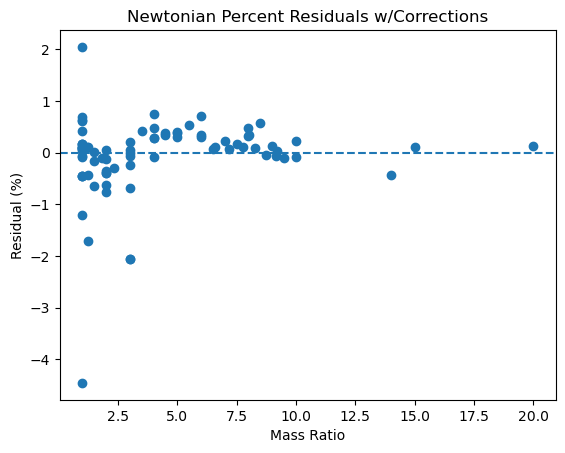

In [21]:
corrections = loaded_model.predict(init_param)

#plt.scatter(df_3["reference_mass_ratio"], (Newtonian_CHT([ref_orb_period, df_3["reference_mass_ratio"]]) - CHT*(1 + corrections))/CHT)
#While the line of code above has a more intuitive interpretation based on how I actually defined the corrections, the code below ends up plotting that
#always has a smaller error because it always overestimates CHT at high mass ratios but is pretty accurate at low mass ratios (never negative)
plt.scatter(df_3["reference_mass_ratio"], 100*(Newtonian_CHT([ref_orb_period, df_3["reference_mass_ratio"]])/(1 + corrections) - CHT)/CHT)
plt.axhline(0, linestyle = '--')
plt.xlabel("Mass Ratio")
plt.ylabel("Residual (%)")
plt.title("Newtonian Percent Residuals w/Corrections")
plt.savefig(r"Newtonian_Percent_Residuals_with_Corrections.png")

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

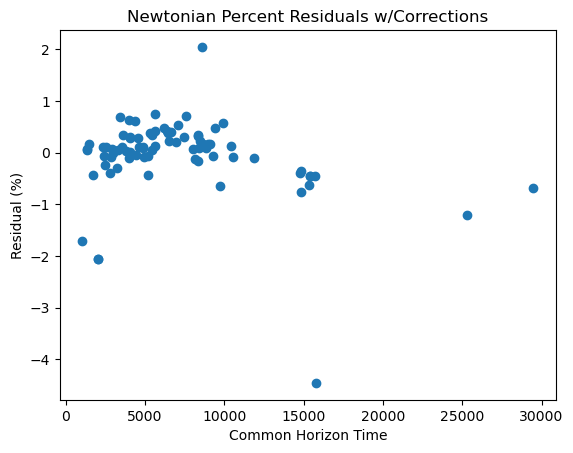

In [43]:
plt.scatter(CHT, 100*(Newtonian_CHT([ref_orb_period, df_3["reference_mass_ratio"]])/(1 + corrections) - CHT)/CHT)
plt.xlabel("Common Horizon Time")
plt.ylabel("Residual (%)")
plt.title("Newtonian Percent Residuals w/Corrections")
plt.savefig(r"Newt_Per_Resid_Corrected_CHT_Distribution.png")

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe2 in position 4095: unexpected end of data

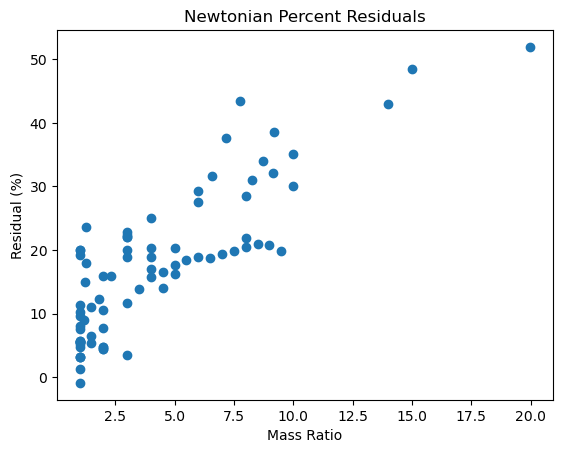

In [46]:
plt.scatter(df_3["reference_mass_ratio"], 100*Newt_Per_Residual)
plt.xlabel("Mass Ratio")
plt.ylabel("Residual (%)")
plt.title("Newtonian Percent Residuals")
plt.savefig(r"Newtonian_Percent_Residuals.png")

In [9]:
model = PySRRegressor(
    niterations=30,
    binary_operators=["+", "*", "-"],
    unary_operators=["square", "cube", "sqrt", "cbrt", "inv(x) = 1/x"], #"cube_root(x) = cbrt(x)"
    extra_sympy_mappings={"inv": lambda x: 1/x}, #"square": lambda x: x**2, "cube_root": lambda x: x**(1/3)
    **default_pysr_params,
    elementwise_loss="loss(prediction, target, w) = ((prediction - target)/w)^2"
    # ^ Custom loss function (julia syntax). It takes the difference of the Newtonian residual from the PySR estimation and weights it by the inverse
    #of the length of the original simulation
)

In [13]:
Newt_Residual = Newtonian_CHT([ref_orb_period, df_3["reference_mass_ratio"]]) - CHT #Here, I calculate the absolute difference between what the quadrupole mode
#of gravitational waves predicts from what the actual, simulation common horizon time is

num = 100

for i in range(num):

    model.fit(init_param, Newt_Residual, weights = CHT)
    Residual_pred = model.predict(init_param)
    current_avg_error = 100*np.sqrt(np.power((Newt_Residual - Residual_pred)/CHT, 2)).mean() 
    
    print("Current Prediction Average Error (%):", current_avg_error)
    print("Best Prediction Average Error (%):", best_avg_error)
    print("Current Model Formula:", model.sympy())
    plt.scatter(df_3["reference_mass_ratio"], 100*(Newt_Residual - Residual_pred)/CHT, marker = ".", label = "PySR")
    plt.xlabel("Mass ratio")
    plt.ylabel("Error in CHT (%)")
    plt.title("Percent Residuals")

    if current_avg_error < best_avg_error:
        best_avg_error = current_avg_error
        best_model = model.equations_
        plt.savefig(f"best_model_{round(best_avg_error, 3)}.png")
        with open(f'best_model_{round(best_avg_error, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
            pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
    elif current_avg_error < 1.5*best_avg_error:
        plt.savefig(f"good_model_{round(current_avg_error, 3)}.png")
        with open(f'good_model_{round(current_avg_error, 3)}.pk', 'wb') as good_model_file:
            pickle.dump(model, good_model_file)
            
    plt.close()

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.127e-01  y = (x₁ + 0.68087) * (x₀ * 0.54071)
8           2.513e-08  7.589e-02  y = (x₀ * (inv(x₁) + x₁)) * 0.56815
9           2.270e-08  1.016e-01  y = ((inv(square(x₁)) + x₁) * x₀) * 0.58214
10          1.738e-08  2.670e-01  y = 0.58224 * ((x₁ + inv(x₁ * 1.5448)) * x₀)
11          1.646e-08  5.415e-02  y = (square(inv(1.5321 * x₁)) + (x₁ * 0.59022)) * x₀
12          1.576e-08  4.352e-02  y = ((x₁ * 0.58714) + inv(x₁ * (x₁ + 1.22))) * x₀
13          1.437e-08  9.236e-02  y = (inv(1.5828 + cube(x₁)) + (0.60819 * x₁)) * (x₀ - x₁)
15          1.426e-08  3.878e-03  y = ((inv(1.5828 + cube(x₁)) + (0.60819 * x₁)) * (x₀ - x₁)...
                                      ) + 1.5828


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224555_ZJM0Nn/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.71
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.717e-08  6.115e-01  y = (x₁ + 0.65798) * (0.54302 * x₀)
8           2.513e-08  7.814e-02  y = ((inv(x₁) + x₁) * 0.56815) * x₀
10          1.638e-08  2.138e-01  y = ((inv(x₁) + x₁) + -0.26506) * (x₀ * 0.59799)
12          1.379e-08  8.601e-02  y = ((x₁ + -0.41623) + inv(x₁)) * ((x₀ * 0.6449) - x₁)
14          1.257e-08  4.653e-02  y = (x₁ + (inv(x₁) + -0.41219)) * (((x₀ - x₁) * 0.67552) +...
                                       -12.255)
16          1.221e-08  1.441e-02  y = ((x₁ + inv(x₁)) + -0.41444) * (((x₀ - (x₁ + 0.47367)) ...
                                      * 0.70485) + -20.035)
────────────────────────────────────────────────────────────────────────────────────────────

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224607_HkvLno/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.71
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = (x₁ * 0.60679) * x₀
7           2.711e-08  6.126e-01  y = ((x₁ + 0.68553) * x₀) * 0.54033
8           2.513e-08  7.596e-02  y = (x₀ * 0.56816) * (x₁ + inv(x₁))
9           2.274e-08  9.969e-02  y = ((inv(square(x₁)) + x₁) * 0.58058) * x₀
10          1.637e-08  3.288e-01  y = x₀ * (((x₁ * 1.3648) + inv(x₁)) * 0.42543)
11          1.628e-08  5.260e-03  y = x₀ * (((square(inv(x₁)) * 0.78965) + x₁) * 0.58869)
12          1.573e-08  3.491e-02  y = (x₀ * (inv(cube(sqrt(x₁))) + (x₁ * 1.3538))) * 0.43366
13          1.335e-08  1.636e-01  y = (inv(square(x₁ * 1.1431)) + x₁) * ((x₀ * 0.64392) + -1...
                                      6.312)
14          1.273e-08  4.756e-02  y = ((x₀ * 0.68475) + -27.811) * (inv(x₁ * (x₁ 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.65
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = (x₁ * 0.60679) * x₀
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54067) + 0.36836) * x₀
8           2.513e-08  7.589e-02  y = (x₁ + inv(x₁)) * (x₀ * 0.56816)
10          1.639e-08  2.136e-01  y = (x₀ * 0.59727) * ((inv(x₁) + x₁) - 0.25911)
12          1.383e-08  8.485e-02  y = ((x₀ * 0.64801) - x₁) * (inv(x₁) + (x₁ - 0.44092))
14          1.358e-08  9.402e-03  y = (((x₁ + inv(x₁)) - 0.38044) * (x₀ + (-3.9664 - x₁))) *...
                                       0.63772
16          1.285e-08  2.751e-02  y = (inv(x₁) + (x₁ - 0.44408)) * ((((x₀ * 0.69215) - x₁) +...
                                       -11.423) - 1.5903)
18          1.278e-08  2.649e-03  y = (0.88705 + ((inv(x₁) + (x₁ - 0.44408)) * (((x₀ * 0.692...


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224623_Fel7p9/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.77
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = (x₀ * (x₁ + 0.68815)) * 0.54001
8           2.513e-08  7.608e-02  y = x₀ * ((x₁ + inv(x₁)) * 0.56816)
10          1.626e-08  2.175e-01  y = (x₀ * ((x₁ + inv(x₁)) * 0.59679)) - 46.837
12          1.613e-08  4.049e-03  y = ((x₀ * (inv(x₁) + x₁)) * 0.60004) - (x₁ + 47.431)
14          1.568e-08  1.429e-02  y = (((x₁ + (inv(x₁ + -0.36694) + x₁)) * 0.29294) * x₀) - ...
                                      x₁
16          1.556e-08  3.860e-03  y = (((x₀ * 0.29536) * (x₁ + (x₁ + inv(x₁ + -0.36706)))) -...
                                       x₁) - x₁
17          1.529e-08  1.749e-02  y = (sqrt(x₀) * inv(x₁ * 0.1

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224628_VnvNsU/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.82
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54067) + 0.36837)
8           2.513e-08  7.589e-02  y = (x₀ * 0.56816) * (inv(x₁) + x₁)
9           2.270e-08  1.016e-01  y = (x₀ * 0.58214) * (square(inv(x₁)) + x₁)
10          1.639e-08  3.259e-01  y = (-0.27101 + (x₁ + inv(x₁))) * (0.59835 * x₀)
11          1.591e-08  2.928e-02  y = (x₀ * 0.58925) * (inv(square(x₁ + 0.15364)) + x₁)
13          1.270e-08  1.127e-01  y = (inv(square(x₁ + 0.15618)) + x₁) * ((x₀ * 0.65949) + -...
                                      20.814)
15          1.268e-08  9.000e-04  y = ((inv(square(x₁ + 0.15618)) + x₁) * ((x₀ * 0.65949) + ...
                         

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224634_qRRLLe/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.81
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₁ * (x₀ * 0.60678)
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54067) - -0.36837)
8           2.513e-08  7.589e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56816)
9           2.280e-08  9.732e-02  y = ((inv(square(x₁)) + x₁) * 0.5798) * x₀
10          1.639e-08  3.298e-01  y = x₀ * (((x₁ + -0.26013) + inv(x₁)) * 0.59777)
11          1.594e-08  2.786e-02  y = (x₀ * 0.59016) * (inv(square(-0.16249 - x₁)) + x₁)
13          1.565e-08  9.137e-03  y = ((inv(square(x₁ - -0.15478)) + x₁) * (x₀ * 0.59252)) -...
                                       x₁
15          1.519e-08  1.511e-02  y = ((square(inv(x₁ - -0.16541)) + x₁) * ((x₀ * 0.59673) +...
                            

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224639_pob3CG/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.82
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = x₀ * ((x₁ * 0.5405) + 0.36796)
8           2.513e-08  7.593e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = ((square(inv(x₁)) + x₁) * x₀) * 0.58214
10          1.639e-08  3.256e-01  y = (x₀ * 0.59733) * (x₁ + (inv(x₁) + -0.25964))
12          1.604e-08  1.075e-02  y = x₀ * ((inv(x₁ + x₁) + -0.07451) + (x₁ * 0.58923))
13          1.391e-08  1.427e-01  y = (x₀ - x₁) * (inv(cube(x₁) - -1.4172) + (0.60965 * x₁))
15          1.387e-08  1.419e-03  y = ((x₀ - x₁) * ((x₁ * 0.60965) + inv(cube(x₁) - -1.3416)...
                                      )) + -1.7291
17          1.382e-08  1

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224645_vyy5Wg/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.75
3           2.297e-06  2.238e-02  y = x₀ * 1.9369
4           5.486e-07  1.432e+00  y = sqrt(x₁) * 415.3
5           9.231e-08  1.782e+00  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54067) + 0.36839)
8           2.513e-08  7.589e-02  y = (x₀ * (inv(x₁) + x₁)) * 0.56815
9           2.270e-08  1.016e-01  y = ((x₁ + square(inv(x₁))) * x₀) * 0.58214
10          1.642e-08  3.237e-01  y = x₀ * ((inv(x₁ * 1.3286) + x₁) * 0.57981)
11          1.621e-08  1.287e-02  y = x₀ * (((cube(inv(x₁)) + 1.3028) * x₁) * 0.45276)
13          1.536e-08  2.689e-02  y = (x₁ * ((cube(inv(x₁)) + 1.2625) * 0.48071)) * (x₀ - x₁...
                                      )
14          1.405e-08  8.959e-02  y = (((x₀ * 0.50148) - sqrt(x₀)) * (cube(in

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224649_qzP4JH/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.82
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54067) + 0.36849)
8           2.513e-08  7.589e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56816)
9           2.319e-08  8.014e-02  y = x₀ * (0.5874 * (square(inv(x₁)) + x₁))
10          1.639e-08  3.471e-01  y = (((inv(x₁) + -0.27434) + x₁) * x₀) * 0.59929
11          1.593e-08  2.849e-02  y = x₀ * (0.58948 * (square(inv(x₁ - -0.14334)) + x₁))
12          1.589e-08  2.263e-03  y = (inv((x₁ * x₁) - -0.28944) + x₁) * (x₀ * 0.58948)
13          1.567e-08  1.396e-02  y = ((inv(square(-0.47327 - x₁)) + (x₁ * 0.58948)) * x₀) -...
                                       x₁
14          1.554e-08  8.271e-03  y =

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224656_mlpQTx/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.85
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.126e-01  y = (x₁ + 0.6795) * (x₀ * 0.54085)
8           2.513e-08  7.590e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56816
10          1.639e-08  2.136e-01  y = x₀ * (0.59907 * (-0.27489 + (x₁ + inv(x₁))))
11          1.623e-08  9.549e-03  y = x₀ * ((x₁ * 0.59165) + square(inv(x₁ + 0.56621)))
12          1.270e-08  2.452e-01  y = ((x₁ + inv(x₁)) + -0.28053) * ((x₀ * 0.68734) - 26.034...
                                      )
15          1.203e-08  1.807e-02  y = ((cbrt(x₁) * -10.819) + (x₀ * 0.68909)) * ((x₁ + -0.43...
                                      126) + inv(x₁))
───────────────────────────────────────────────────────────────────────────────────────────────────
Current 

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224702_Fkd53g/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.71
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.126e-01  y = ((x₁ * 0.54087) - -0.36829) * x₀
8           2.513e-08  7.591e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = (x₀ * 0.58213) * (square(inv(x₁)) + x₁)
10          1.708e-08  2.843e-01  y = ((x₁ - (0.33507 - inv(x₁))) * x₀) * 0.60411
12          1.396e-08  1.008e-01  y = ((x₁ - (0.36857 - inv(x₁))) * 0.62877) * (x₀ - x₁)
16          1.378e-08  3.258e-03  y = (((x₁ - (0.029229 - inv(x₁))) - 0.34224) * ((x₀ - x₁) ...
                                      * 0.63137)) - x₁
18          1.356e-08  8.259e-03  y = ((x₀ - (x₁ - -4.6681)) * (((x₁ - (0.049569 - inv(x₁)))...
               

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224707_zB7Nfk/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.82
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.125e-01  y = (0.54152 * x₀) * (x₁ - -0.6747)
8           2.513e-08  7.611e-02  y = (x₀ * 0.56816) * (inv(x₁) + x₁)
9           2.270e-08  1.016e-01  y = (x₀ * (square(inv(x₁)) + x₁)) * 0.58214
10          1.734e-08  2.694e-01  y = ((inv(x₁ + 0.35891) + x₁) * 0.57695) * x₀
11          1.712e-08  1.261e-02  y = x₀ * ((square(inv(x₁ - -0.17636)) + x₁) * 0.58214)
12          1.541e-08  1.052e-01  y = (x₁ + inv(x₁ * 1.2411)) * ((x₀ * 0.61752) - 12.002)
14          1.441e-08  3.350e-02  y = ((x₀ * 0.63198) - 16.709) * (x₁ + inv((x₁ + x₁) - 0.74...
                                      932))
16          1.437e-08  1.460e-03  y

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224713_RozGQh/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.9
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₁ * (x₀ * 0.6068)
7           2.711e-08  6.126e-01  y = x₀ * (0.36955 - (x₁ * -0.5406))
9           2.709e-08  3.070e-04  y = (x₀ + -0.59966) * (0.37366 - (x₁ * -0.54036))
10          1.364e-08  6.863e-01  y = x₀ + ((x₀ + -85.031) * (x₁ - sqrt(x₁)))
12          1.281e-08  3.115e-02  y = x₀ + ((x₀ + -84.774) * ((x₁ - sqrt(x₁)) - 0.039535))
14          1.254e-08  1.069e-02  y = (((x₀ + -75.606) * ((x₁ * 0.97315) - sqrt(x₁))) + x₀) ...
                                      - 3.6013
15          1.090e-08  1.406e-01  y = (((x₀ + -84.795) * (x₁ - sqrt(x₁))) + x₀) - inv(-2.967...
                                      3 + x₁)
17          1.072e-08  8.019e-03  y = x₁ + (x₀

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224718_TC8Zox/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.78
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * 0.60679) * x₀
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54067) + 0.36841) * x₀
9           2.683e-08  5.051e-03  y = ((x₀ * 0.55165) + -3.2169) * (x₁ - -0.67909)
10          1.644e-08  4.903e-01  y = (x₀ * ((x₁ * 1.3238) + inv(x₁))) * 0.43777
12          1.401e-08  7.981e-02  y = ((x₀ * 0.46964) + -15.954) * (inv(x₁) + (x₁ * 1.3962))
15          1.399e-08  3.791e-04  y = (inv(x₁) + (x₁ * 1.3962)) * ((x₀ * 0.46964) + (-15.954...
                                       + inv(x₁)))
17          1.397e-08  8.836e-04  y = ((x₁ * 1.6064) + inv(x₁)) * (((x₀ * 0.38614) - inv(0.9...
                                      2262 - x₁)) + -6.7851)
18          1.384e-08

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 0.7407974740727973
Best Prediction Average Error (%): 0.4770277128476552
Current Model Formula: x0*(x1*1.3237762 + 1/x1)*0.43777028
  - outputs/20250702_224724_fjjmPw/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.76
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = x₁ * (x₀ * 0.60678)
7           2.711e-08  6.126e-01  y = (x₀ * 0.54099) * (x₁ + 0.67796)
8           2.513e-08  7.594e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = ((x₁ + square(inv(x₁))) * x₀) * 0.58214
10          1.643e-08  3.229e-01  y = x₀ * ((x₁ + (inv(x₁) * 0.75524)) * 0.57967)
12          1.612e-08  9.728e-03  y = x₀ * ((x₁ * 0.58869) + inv(x₁ * (x₁ + 1.4542)))
13          1.393e-08  1.461e-01  y = ((x₁ * 0.61019) + inv(1.4494 + cube(x₁))) * (x₀ - x₁)
15          1.385e-08  2.674e-03  y = ((x₁ * 0.61238) + inv(cube(x₁) + 1.4555)) * ((x₀ - x₁)...
                                       + -1.4027)
16          1.385e-08  8.440e-05  y = ((x₁ * 0.61238) + inv(cube(x₁) + 1.4555)) 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.69
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54067) + 0.3684) * x₀
9           2.577e-08  2.527e-02  y = ((0.51635 * x₁) + 0.40253) * (x₁ + x₀)
10          2.453e-08  4.958e-02  y = -1.687 - ((x₁ + inv(x₁)) * (x₀ * -0.56822))
12          2.156e-08  6.447e-02  y = (x₀ * (0.1933 + (0.56398 * x₁))) + inv(x₁ * 0.019746)
13          1.992e-08  7.891e-02  y = inv(0.019746 * square(x₁)) + (x₀ * ((x₁ * 0.56398) + 0...
                                      .1933))
14          1.835e-08  8.216e-02  y = (x₀ * ((x₁ + 0.50869) * 0.54915)) + inv(square(square(...
                                      x₁ * -0.34747)))
16          1.754e-08  2.260e-02  y = (((x₁ * 0.55364) + 0.26556) * x₀) + inv(square(square

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224741_DWVnQ7/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54065) + 0.36849) * x₀
8           2.513e-08  7.589e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = (square(inv(x₁)) + x₁) * (x₀ * 0.58214)
10          1.683e-08  2.989e-01  y = (((x₁ + inv(x₁)) * x₀) * 0.58991) - 35.414
12          1.359e-08  1.070e-01  y = ((x₁ + inv(x₁)) + -0.25486) * ((x₀ * 0.65119) + -16.16...
                                      4)
13          1.244e-08  8.879e-02  y = ((x₀ * 0.66965) + -24.098) * (inv(square(x₁) + 0.33407...
                                      ) + x₁)
15          1.240e-08  1.419e-03  y = ((x₀ * -0.32828) + (x₀ + -24.479)) * 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.6940125696543951
Best Prediction Average Error (%): 0.4770277128476552
Current Model Formula: (x0*0.6511883 - 16.164328)*(x1 - 0.2548616 + 1/x1)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224746_7ZTfTC/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.85
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54065) + 0.3684) * x₀
8           2.513e-08  7.589e-02  y = (x₁ + inv(x₁)) * (x₀ * 0.56816)
9           2.398e-08  4.662e-02  y = (x₀ * (inv(cube(x₁)) + x₁)) * 0.58676
10          1.746e-08  3.173e-01  y = ((inv(x₁ + 0.30935) + x₁) * x₀) * 0.57739
12          1.453e-08  9.176e-02  y = (0.65516 * (x₀ + -32.451)) * (x₁ + inv(x₁ * 1.5313))
13          1.351e-08  7.310e-02  y = (inv(square(x₁) + 0.2224) + x₁) * (0.65516 * (x₀ + -32...
                                      .451))
14          1.318e-08  2.456e-02  y = (x₁ + inv(sqrt(cube(x₁) + x₁))) * ((x₀ + -38.891) * 0....
                                      67348)
15          1.217e-08  7.962e-02  y 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224757_XSxmJF/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.78
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54069) + 0.36826) * x₀
8           2.513e-08  7.589e-02  y = (x₀ * (inv(x₁) + x₁)) * 0.56815
9           2.270e-08  1.016e-01  y = ((x₁ + inv(square(x₁))) * 0.58214) * x₀
10          1.709e-08  2.841e-01  y = (-0.16333 + ((inv(x₁) + x₁) * 0.59274)) * x₀
11          1.662e-08  2.783e-02  y = (0.59274 * (cube(-0.62871) + (x₁ + inv(x₁)))) * x₀
12          1.575e-08  5.385e-02  y = x₀ * ((x₁ * 0.58781) + inv(x₁ * (x₁ + 1.3161)))
13          1.572e-08  1.685e-03  y = x₁ * (x₀ * (inv(x₁ + (cube(x₁) * 1.3162)) + 0.58747))
14          1.541e-08  1.980e-02  y = (x₀ + -2.7226) * (inv(x₁ * (x₁ + 1.3161)) + (0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Model Formula: x0*((x1 + 1/x1)*0.5927421 - 0.16332959)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224802_FoDXav/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.75
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.126e-01  y = ((x₁ * 0.54055) + 0.3686) * x₀
8           2.513e-08  7.590e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56815
9           2.290e-08  9.279e-02  y = 0.5855 * ((inv(square(x₁)) + x₁) * x₀)
10          1.732e-08  2.792e-01  y = x₀ * ((x₁ * 0.5855) - inv(-2.2221 * x₁))
11          1.654e-08  4.639e-02  y = x₀ * ((x₁ * 0.5855) - inv(-2.2221 * square(x₁)))
12          1.579e-08  4.600e-02  y = ((x₁ + inv((0.31386 - x₁) * -1.9705)) * 0.58389) * x₀
15          1.559e-08  4.342e-03  y = (x₀ * ((inv(-1.9705 * (square(0.5855) - x₁)) + x₁) * 0...
                                      .5855)) - x₁
17          1.554e-08  1.466e-03  y = ((x₀ * x₁) * 0.58688) - ((inv(x₁ - 0.56297) *

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224808_5HjanN/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.72
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = (x₁ * 0.60679) * x₀
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54072) + 0.36819) * x₀
8           2.513e-08  7.589e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56815
10          1.626e-08  2.175e-01  y = ((x₀ * 0.59734) * (x₁ + inv(x₁))) - 47.486
12          1.613e-08  4.075e-03  y = ((((x₁ + inv(x₁)) * x₀) * 0.60043) - 47.486) - x₁
13          1.326e-08  1.957e-01  y = (inv(square(x₁) + x₁) + (x₁ * 0.64023)) * (x₀ - 24.563...
                                      )
───────────────────────────────────────────────────────────────────────────────────────────────────
Current Prediction Average Error (%): 0.8053413687844001
Best Prediction Average Error (%): 0.4770277128476

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224813_v1fhLQ/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.76
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.5407) + 0.36823)
8           2.513e-08  7.589e-02  y = (x₀ * 0.56816) * (x₁ + inv(x₁))
9           2.270e-08  1.016e-01  y = ((inv(square(x₁)) + x₁) * 0.58214) * x₀
10          1.638e-08  3.260e-01  y = (((x₁ + inv(x₁)) + -0.26356) * 0.59775) * x₀
12          1.581e-08  1.774e-02  y = (x₀ * 0.29145) * ((x₁ + inv(x₁ - 0.36048)) + x₁)
13          1.576e-08  3.398e-03  y = ((inv(x₁ - square(0.58193)) + (x₁ + x₁)) * x₀) * 0.292...
                                      18
14          1.448e-08  8.495e-02  y = (inv(x₁ - 0.34574) + (x₁ + x₁)) * ((x₀ - 11.286) * 0.3...
                                

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224818_7d3g3e/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.126e-01  y = x₀ * ((x₁ * 0.54099) + 0.3664)
8           2.513e-08  7.596e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = (x₀ * (x₁ + inv(square(x₁)))) * 0.58214
10          1.638e-08  3.261e-01  y = x₀ * (((x₁ + inv(x₁)) * 0.59829) + -0.16028)
12          1.396e-08  7.995e-02  y = (0.62849 * (x₀ - x₁)) * (inv(x₁) + (-0.36862 + x₁))
14          1.395e-08  2.838e-04  y = ((0.62849 * (x₀ - x₁)) * (inv(x₁) + (-0.36862 + x₁))) ...
                                      - x₁
16          1.391e-08  1.546e-03  y = ((((x₀ - x₁) + -1.2688) * 0.62849) * (inv(x₁) + (x₁ + ...
                                      -0.36862))) - -1.4669
18          1.391e-0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = x₁ * (x₀ * 0.6068)
7           2.711e-08  6.126e-01  y = x₀ * ((x₁ * 0.54066) + 0.36877)
8           2.513e-08  7.590e-02  y = (x₀ * 0.56815) * (inv(x₁) + x₁)
10          1.734e-08  1.853e-01  y = x₀ * ((x₁ + inv(x₁ - -0.35089)) * 0.57637)
12          1.626e-08  3.214e-02  y = ((inv(x₁) + x₁) * ((x₀ * 1.5978) - x₀)) + -48.244
14          1.548e-08  2.477e-02  y = ((x₁ + 5.1588) * -10.215) + (x₀ * (0.6335 * (x₁ + inv(...
                                      x₁))))
16          1.372e-08  6.041e-02  y = ((x₁ + inv(x₁)) * ((x₀ + (x₀ * -0.35219)) - x₁)) - (x₀...
                                       * 0.27438)
18          1.371e-08  3.156e-04  y = (-0.82215 + (((x₀ + (x₀ * -0.35219)) - x₁) * (inv(x₁) ...
              

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224829_0AW3ep/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.91
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60678
7           2.714e-08  6.121e-01  y = x₀ * ((x₁ + 0.66496) * 0.54227)
8           2.513e-08  7.699e-02  y = (x₀ * (x₁ + inv(x₁))) * 0.56816
9           2.270e-08  1.016e-01  y = x₀ * ((x₁ + inv(square(x₁))) * 0.58214)
10          1.638e-08  3.265e-01  y = x₀ * ((inv(x₁ * 1.3525) + x₁) * 0.58018)
11          1.606e-08  1.918e-02  y = (inv(square(x₁) + 1.2603) + (x₁ * 0.5858)) * x₀
12          1.577e-08  1.876e-02  y = (inv((x₁ + 1.2603) * x₁) + (x₁ * 0.5858)) * x₀
13          1.532e-08  2.894e-02  y = ((x₀ * 0.59801) + -2.7696) * (x₁ + inv(square(x₁ + 0.1...
                                      3714)))
15          1.529e-08  9.496e-04  y = (((x₀ * 0.59801) + -2.7696) * (x₁ + square(inv(x₁ + 0...

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.81
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (0.60679 * x₁) * x₀
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.5407) - -0.36824)
8           2.513e-08  7.589e-02  y = (x₀ * (x₁ + inv(x₁))) * 0.56816
9           1.589e-08  4.585e-01  y = (x₀ * cbrt(cube(x₁) + 4.2708)) * 0.58612
11          1.583e-08  1.906e-03  y = 0.58632 * ((x₀ * cbrt(4.2865 + cube(x₁))) - x₁)
13          1.485e-08  3.195e-02  y = cbrt((cube(x₁) * 0.55276) - -2.3898) * ((x₀ * 0.73499)...
                                       - 6.2332)
16          1.480e-08  9.406e-04  y = (x₀ - (x₁ * cbrt(0.47493))) * (cbrt((cube(x₁) * 0.4356...
                                      1) - -1.5572) * 0.79824)
17          1.463e-08  1.149e-02  y = (((x₀ - (x₁ * 0.79824)) * cbrt((cube(x₁) * 0.43561) - ...

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 0.7941720515118692
Best Prediction Average Error (%): 0.4770277128476552
Current Model Formula: (x1 - 1*0.24198006 + 1/x1)*x0*0.59533125
  - outputs/20250702_224846_Dcq2OD/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.69
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = ((x₁ * 0.54081) + 0.36861) * x₀
8           2.513e-08  7.591e-02  y = (x₀ * 0.56815) * (x₁ + inv(x₁))
9           2.270e-08  1.016e-01  y = (x₁ + inv(square(x₁))) * (x₀ * 0.58214)
10          1.637e-08  3.267e-01  y = x₀ * ((inv(x₁) + (x₁ * 1.3745)) * 0.42251)
14          1.631e-08  8.982e-04  y = ((x₁ * (x₀ * 0.58265)) + ((x₀ * inv(x₁)) * 0.44419)) -...
                                       x₁
16          1.616e-08  4.721e-03  y = ((x₀ * (inv(x₁) * 0.42624)) - x₁) + ((x₁ * (x₀ + x₀)) ...
                                      * 0.2919)
18          1.596e-08  6.270e-03  y = ((((x₀ * 0.42628) * inv(x₁)) - x₁) - x₁) + ((x₁ * 0.29...
                           

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.74
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (0.60679 * x₁) * x₀
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54066) + 0.36849) * x₀
8           2.513e-08  7.589e-02  y = (x₀ * (inv(x₁) + x₁)) * 0.56815
9           2.478e-08  1.395e-02  y = (0.5935 * (cube(inv(x₁)) + x₁)) * x₀
10          1.641e-08  4.120e-01  y = ((inv(x₁) + (x₁ - 0.282)) * 0.59993) * x₀
12          1.519e-08  3.875e-02  y = ((x₀ - x₁) * (inv(x₁) + (x₁ - 0.37982))) * 0.62098
15          1.485e-08  7.439e-03  y = (((x₁ + sqrt(sqrt(inv(cube(x₁))))) - 0.37982) * (x₀ - ...
                                      x₁)) * 0.62098
17          1.482e-08  1.208e-03  y = (((cube(sqrt(inv(sqrt(x₁)))) + (x₁ - 0.37982)) * (x₀ -...
                                       x₁)) * 0.62098) + -1.1187
19        

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224903_bUECnh/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54066) + 0.36846)
8           2.513e-08  7.589e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56815
9           2.398e-08  4.662e-02  y = ((x₁ + cube(inv(x₁))) * x₀) * 0.58676
10          1.640e-08  3.799e-01  y = (x₀ * 0.59961) * ((x₁ + inv(x₁)) + -0.27969)
12          1.611e-08  9.085e-03  y = cbrt((square(x₀) + cube((x₀ * 0.087335) * x₁)) * x₀)
14          1.168e-08  1.606e-01  y = cbrt(x₀ * (square(x₀) + cube((0.090915 * (x₁ - 0.32246...
                                      )) * x₀)))
16          1.117e-08  2.227e-02  y = cbrt(x₀ * (cube(x₀ * (0.090915 * (x₁ - 0.32246))) + sq...
                      

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224909_yokd0D/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.77
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.126e-01  y = ((x₁ * 0.54057) + 0.36836) * x₀
8           2.513e-08  7.590e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56816
9           2.270e-08  1.016e-01  y = (x₀ * (x₁ + inv(square(x₁)))) * 0.58214
10          1.662e-08  3.115e-01  y = x₀ * (((x₁ + inv(x₁)) + -0.26658) * 0.59435)
11          1.638e-08  1.505e-02  y = (x₁ * (inv(square(x₁) * 2.372) + 0.58071)) * x₀
13          1.621e-08  5.065e-03  y = (inv(square(x₁)) * (x₀ * 0.45161)) + (x₁ * (0.58991 * ...
                                      x₀))
14          1.581e-08  2.511e-02  y = ((x₀ * x₁) * 0.58581) + (inv(sqrt(cube(x₁))) * (x₀ * 0...
                                      .45799))
15          1.572e-08  5.430e-03  y

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224920_VkNcEe/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.71
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54067) + 0.36836) * x₀
9           2.576e-08  2.542e-02  y = ((x₁ * 0.51638) + 0.40345) * (x₁ + x₀)
11          2.576e-08  6.548e-05  y = (((x₁ * 0.51638) + 0.40345) * (x₁ + x₀)) + 0.56902
12          1.637e-08  4.534e-01  y = ((x₀ * x₁) * 0.58047) + ((x₀ * inv(x₁)) * 0.42531)
13          1.621e-08  9.766e-03  y = (x₀ * (x₁ * 0.58991)) + (x₀ * (square(inv(x₁)) * 0.451...
                                      57))
15          1.433e-08  6.178e-02  y = ((x₀ * square(inv(x₁))) * 0.4266) + (((x₀ - x₁) * x₁) ...
                                      * 0.60956)
16          1.429e-08  2.300e-03  y = (((x₀

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224925_EaYUD0/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.82
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (0.60679 * x₁)
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54063) + 0.36847)
8           2.513e-08  7.589e-02  y = 0.56816 * ((x₁ + inv(x₁)) * x₀)
9           2.270e-08  1.016e-01  y = ((x₁ + inv(square(x₁))) * 0.58214) * x₀
10          1.735e-08  2.685e-01  y = (x₀ * (inv(x₁ + 0.33781) + x₁)) * 0.57657
11          1.592e-08  8.636e-02  y = (x₀ * 0.589) * (inv(square(x₁ + 0.14542)) + x₁)
12          1.586e-08  3.372e-03  y = (x₁ + cube(inv(sqrt(x₁ + 0.24474)))) * (x₀ * 0.58574)
13          1.552e-08  2.217e-02  y = ((x₀ - 2.8618) * 0.59523) * (x₁ + inv(square(x₁ + 0.15...
                                      86)))
14          1.548e-08  2.111e-03  y = ((x₀ - cbrt(x₁)) * 0.59295) * (inv(square(x₁ + 0.1

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224936_8HKSsw/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.69
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * 0.60679) * x₀
7           2.712e-08  6.124e-01  y = ((x₁ + 0.69214) * x₀) * 0.53965
8           2.513e-08  7.637e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = (inv(square(x₁)) + x₁) * (x₀ * 0.58214)
10          1.770e-08  2.485e-01  y = (x₁ + inv(x₁ + 0.46987)) * (x₀ * 0.57876)
12          1.740e-08  8.673e-03  y = ((x₀ * (x₁ + inv(x₁ + 0.30407))) * 0.5762) - 0.43939
14          1.674e-08  1.930e-02  y = ((x₁ * x₀) * 0.60197) + (x₀ * (inv(x₁ + 0.53658) + -0....
                                      23871))
16          1.643e-08  9.349e-03  y = (((x₀ * x₁) + (inv((x₁ + x₁) + -0.52928) * x₀)) * 0.58...
                         

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224942_qDfbpi/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.82
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54069) - -0.36814)
9           2.707e-08  6.472e-04  y = ((x₁ * 0.54201) - -0.3684) * (x₀ - 0.65649)
10          1.796e-08  4.104e-01  y = ((inv(-0.42451 - x₁) - x₁) * x₀) * -0.58323
11          1.572e-08  1.333e-01  y = x₀ * (square(inv(x₁ + 0.50746)) - (x₁ * -0.58718))
13          1.548e-08  7.466e-03  y = ((inv(square(x₁ + 0.50999)) - (x₁ * -0.58974)) * x₀) -...
                                       x₁
15          1.546e-08  8.647e-04  y = (inv(square(0.50746 + x₁)) - (-0.58718 * x₁)) * (x₀ - ...
                                      (0.12638 * x₁))
17          1.538e-08  2.645e-03  y = (x₀ * (inv(square(x₁) - (x₁ * -1.1798)) - (x₁ * -0.593

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.79
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = ((x₁ * 0.54058) + 0.36825) * x₀
8           2.513e-08  7.590e-02  y = (x₀ * (inv(x₁) + x₁)) * 0.56816
10          1.649e-08  2.105e-01  y = x₀ * ((x₁ + (inv(x₁) - 0.23876)) * 0.59486)
12          1.393e-08  8.433e-02  y = ((x₁ + -0.45339) + inv(x₁)) * ((x₀ * 0.64974) - x₁)
14          1.323e-08  2.584e-02  y = (((x₀ - x₁) * 0.65711) - 9.8131) * ((inv(x₁) + -0.3260...
                                      7) + x₁)
16          1.307e-08  6.186e-03  y = (((x₁ + -0.32607) + inv(x₁)) * (((x₀ - x₁) * 0.65711) ...
                                      - 9.8131)) + -3.5377
18          1.271e-08  1.392e-02  y = (((((x₀ - x₁) * 0.66608) - 10.799) * (inv(x₁) + (x₁ + ..

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_224953_RGspyD/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.73
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54067) - -0.36837)
8           2.513e-08  7.589e-02  y = (x₀ * 0.56815) * (x₁ + inv(x₁))
9           2.270e-08  1.016e-01  y = (0.58214 * x₀) * (x₁ + inv(square(x₁)))
10          1.637e-08  3.266e-01  y = (x₀ * 0.58023) * (x₁ + inv(x₁ * 1.3543))
11          1.592e-08  2.834e-02  y = (square(inv(x₁ + 0.14627)) + x₁) * (x₀ * 0.58904)
13          1.437e-08  5.106e-02  y = ((inv(cube(x₁) * 2.2864) + 0.60993) * (x₀ - x₁)) * x₁
15          1.428e-08  3.125e-03  y = ((x₀ - x₁) * ((inv(cube(x₁) * 2.2864) + 0.60993) * x₁)...
                                      ) + -2.0347
16          1.411e-08  1.201e-02  y = ((x₀ - x₁) * 0.61472) * (inv(square(x₁ * 0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225004_M4BZ5F/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60678)
7           2.711e-08  6.126e-01  y = (0.36783 + (x₁ * 0.5407)) * x₀
8           2.513e-08  7.590e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56816
9           2.270e-08  1.016e-01  y = ((square(inv(x₁)) + x₁) * x₀) * 0.58214
10          1.639e-08  3.258e-01  y = (((x₁ + inv(x₁)) * 0.59772) - 0.15634) * x₀
12          1.407e-08  7.628e-02  y = ((0.39581 - (inv(x₁) + x₁)) * (x₀ - x₁)) * -0.63186
13          1.404e-08  2.354e-03  y = (sqrt(0.1524) - (x₁ + inv(x₁))) * ((x₀ - x₁) * -0.6318...
                                      6)
14          1.397e-08  4.538e-03  y = (((0.37671 - (x₁ + inv(x₁))) * -0.62926) * (x₀ - x₁)) ...
                               

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7958003268752382
Best Prediction Average Error (%): 0.44584397516875574
Current Model Formula: x0*((x1 + 1/x1)*0.59771854 - 1*0.15633714)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225010_koSI8y/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.77
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.713e-08  6.121e-01  y = (x₀ * 0.54212) * (x₁ + 0.66557)
8           2.513e-08  7.690e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56816
10          1.727e-08  1.876e-01  y = x₀ * ((x₁ + inv(x₁ * 1.2239)) * 0.57675)
12          1.608e-08  3.551e-02  y = ((x₁ * 0.58112) + inv(-0.5242 - (x₁ * -2.74))) * x₀
19          1.556e-08  4.746e-03  y = x₀ + (((cbrt(x₁) * (x₁ * 0.26622)) - 0.2736) * (x₀ + (...
                                      cbrt(x₁ * -2.0553) * x₁)))
21          1.529e-08  8.620e-03  y = (((x₁ * (0.98745 - sqrt(x₁))) + x₀) * ((x₁ * (cbrt(x₁ ...
                                      * x₀) * 0.039692)) - 0.30745)) + x₀
22          

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225015_iqkgHa/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.77
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₁ * (x₀ * 0.60677)
7           2.711e-08  6.126e-01  y = x₀ * ((x₁ + 0.67947) * 0.54085)
8           2.513e-08  7.590e-02  y = (x₀ * (inv(x₁) + x₁)) * 0.56815
9           2.270e-08  1.016e-01  y = x₀ * ((x₁ + square(inv(x₁))) * 0.58214)
10          1.637e-08  3.269e-01  y = x₀ * ((x₁ + inv(x₁ * 1.3629)) * 0.58042)
11          1.578e-08  3.694e-02  y = (x₁ + inv(square(x₁) + 0.34171)) * (x₀ * 0.58894)
12          1.575e-08  1.523e-03  y = x₀ * ((inv((x₁ + x₁) + -0.67057) + x₁) * 0.5836)
13          1.570e-08  3.283e-03  y = ((inv(0.34171 + square(x₁)) + x₁) * (x₀ * 0.58894)) - ...
                                      x₁
14          1.557e-08  8.531e-03  y = (x₀ *

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225021_GDQZJf/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.75
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60678
7           2.711e-08  6.126e-01  y = (x₀ * (x₁ + 0.68214)) * 0.54066
8           2.513e-08  7.590e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56816)
9           2.270e-08  1.016e-01  y = x₀ * ((x₁ + square(inv(x₁))) * 0.58214)
10          1.641e-08  3.246e-01  y = (((x₁ + -0.28075) + inv(x₁)) * 0.59995) * x₀
12          1.380e-08  8.663e-02  y = ((inv(x₁) + -0.41468) + x₁) * ((x₀ * 0.64495) - x₁)
14          1.355e-08  8.925e-03  y = ((inv(x₁) + -0.44644) + x₁) * (((x₀ * 0.65799) - x₁) +...
                                       -2.6836)
15          1.299e-08  4.260e-02  y = ((x₁ + inv(x₁)) + -0.38991) * (((x₀ - x₁) * 0.6938) - ...
                     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225026_ilC9xe/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.71
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * 0.60679) * x₀
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54073) + 0.36805)
8           2.513e-08  7.589e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56816)
9           2.270e-08  1.016e-01  y = (x₀ * 0.58214) * (x₁ + square(inv(x₁)))
10          1.638e-08  3.261e-01  y = (((x₁ + inv(x₁)) + -0.26799) * 0.59844) * x₀
12          1.383e-08  8.464e-02  y = ((inv(x₁) + x₁) + -0.40709) * ((x₀ * 0.64378) - x₁)
14          1.229e-08  5.916e-02  y = ((inv(x₁) + (x₁ + -0.41632)) * 0.6942) * ((x₀ + -24.79...
                                      3) - x₁)
22          1.225e-08  4.333e-04  y = ((-3.2421 + (((x₀ + (-11.75 - (0.64936 * x₁))) + -10.4...
                      

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225031_MtWvDz/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.87
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54067) + 0.36838)
8           2.513e-08  7.589e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56816
9           2.270e-08  1.016e-01  y = ((x₁ + inv(square(x₁))) * 0.58214) * x₀
10          1.677e-08  3.025e-01  y = (x₁ - inv(x₁ * -1.267)) * (x₀ * 0.57794)
12          1.587e-08  2.771e-02  y = (x₀ * 0.58266) * (x₁ - inv(0.73546 - (x₁ + x₁)))
14          1.579e-08  2.623e-03  y = ((x₁ - inv(0.73546 - (x₁ + x₁))) * (x₀ * 0.58266)) - 2...
                                      .7137
16          1.481e-08  3.187e-02  y = ((x₁ * 0.60776) - inv((1.1897 - (x₁ + 2.6986)) * x₁)) ...
                                

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225037_PTHhiW/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.69
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54065) - -0.36831) * x₀
8           2.513e-08  7.589e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = (x₀ * (x₁ + inv(square(x₁)))) * 0.58214
10          1.638e-08  3.261e-01  y = ((inv(x₁) + -0.26649) + x₁) * (x₀ * 0.59815)
12          1.597e-08  1.268e-02  y = (inv(x₁ * 1.3509) + x₁) * ((x₀ * 0.58647) - 2.2235)
13          1.520e-08  4.965e-02  y = ((x₁ + inv(x₁)) + -0.26721) * ((x₀ - sqrt(x₀)) * 0.634...
                                      82)
15          1.519e-08  3.154e-04  y = ((x₁ + (inv(x₁) + -0.26721)) * ((x₀ - sqrt(x₀)) * 0.63...
                          

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7997253366473309
Best Prediction Average Error (%): 0.44584397516875574
Current Model Formula: (x1 - 0.26649255 + 1/x1)*x0*0.5981546


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225043_kQbW18/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.73
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * 0.6068) * x₀
7           2.711e-08  6.126e-01  y = x₀ * ((x₁ - -0.68288) * 0.54057)
8           2.513e-08  7.590e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56815)
10          1.932e-08  1.315e-01  y = ((x₀ * x₁) * 0.58205) + (inv(x₁) * 123.17)
11          1.642e-08  1.627e-01  y = (x₀ * x₁) * ((square(inv(x₁)) * 0.41483) + 0.58114)
13          1.619e-08  6.802e-03  y = (x₀ * (0.56929 * (x₁ - -0.32199))) + (inv(cube(x₁)) * ...
                                      79.469)
15          1.592e-08  8.399e-03  y = (x₀ * (0.56929 * (x₁ - -0.32199))) + ((cube(inv(x₁)) -...
                                       0.06362) * 79.469)
17          1.504e-08  2.872e-02  y = ((cube(

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225049_MegOTE/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.93
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = (x₁ - -0.68411) * (x₀ * 0.54041)
8           2.513e-08  7.592e-02  y = (x₁ + inv(x₁)) * (x₀ * 0.56816)
9           2.281e-08  9.687e-02  y = (x₀ * (x₁ + square(inv(x₁)))) * 0.5846
10          1.734e-08  2.741e-01  y = (x₀ * (inv(x₁ + 0.35602) + x₁)) * 0.57686
12          1.575e-08  4.798e-02  y = (x₀ * (inv(x₁ + (x₁ - 0.67041)) + x₁)) * 0.58371
14          1.574e-08  2.515e-04  y = (x₀ * ((inv((x₁ + x₁) - 0.67041) + x₁) * 0.58371)) - 0...
                                      .88051
24          1.528e-08  2.982e-03  y = (inv(x₁ - sqrt(0.8516)) + ((0.54588 * x₀) - inv((0.236...
                                      85 + (-1.3125 * (0.8516 - x₁))) - x₁))) * (x

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225059_35tVc7/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.712e-08  6.125e-01  y = ((-0.69007 - x₁) * -0.53985) * x₀
9           2.575e-08  2.581e-02  y = (x₀ + x₁) * ((x₁ - -0.78393) * 0.51684)
11          2.524e-08  1.010e-02  y = (x₁ - -0.83639) * (((x₁ + x₀) * 0.52881) - 5.0777)
12          1.887e-08  2.907e-01  y = (inv(x₁ - 3.037) + (x₀ * 0.53717)) * (x₁ - -0.82618)
13          1.715e-08  9.587e-02  y = ((x₀ * 0.54032) - inv(square(x₁ - 2.7862))) * (x₁ - -0...
                                      .77466)
15          1.714e-08  2.751e-04  y = (x₁ - -0.77486) * ((x₀ * 0.54205) - (inv(square(2.7883...
                                       - x₁)) - -0.56994))
16          1.710e-08  2.3

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225105_K29lxP/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.71
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54067) + 0.36837)
8           2.513e-08  7.589e-02  y = (x₀ * (x₁ + inv(x₁))) * 0.56816
9           2.270e-08  1.016e-01  y = (x₁ + inv(square(x₁))) * (x₀ * 0.58214)
10          1.638e-08  3.261e-01  y = (((inv(x₁) + x₁) * 0.59815) + -0.15969) * x₀
11          1.577e-08  3.820e-02  y = x₀ * (inv(square(x₁ + 0.53135)) + (x₁ * 0.5871))
13          1.566e-08  3.313e-03  y = (inv(square(x₁) + 1.3593) + (x₁ * 0.59077)) * (x₀ - 2....
                                      6856)
14          1.549e-08  1.116e-02  y = (inv(square(x₁) + 1.3592) + (x₁ * 0.59205)) * (x₀ - sq...
                                      rt(x₁))
15          1.442e-08  7.190e-02  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225117_FIAbLf/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.75
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = x₁ * (x₀ * 0.60679)
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54067) - -0.36836) * x₀
8           2.513e-08  7.589e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56816
10          1.855e-08  1.518e-01  y = ((x₁ + inv(x₁ + 0.29102)) * 0.56816) * x₀
12          1.855e-08  5.960e-08  y = (x₁ + inv(square(inv(1.8537)) + x₁)) * (x₀ * 0.56816)
13          1.530e-08  1.921e-01  y = x₀ + ((x₀ - (x₁ * 2.3864)) * (x₁ - square(cbrt(x₁))))
14          1.483e-08  3.139e-02  y = ((x₀ * (x₁ - square(cbrt(x₁)))) + x₀) - (square(x₁) * ...
                                      1.4154)
16          1.481e-08  7.641e-04  y = ((x₀ + (x₀ * (x₁ - cbrt(square(x₁))))) - (square(x₁) *...
                                       1.3991)) + -1.9606
17 

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250702_225123_ji6UFC/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * 0.60679) * x₀
7           2.713e-08  6.122e-01  y = x₀ * ((x₁ * 0.54094) + 0.36254)
8           2.513e-08  7.685e-02  y = x₀ * ((inv(x₁) + x₁) * 0.56815)
9           2.270e-08  1.016e-01  y = (inv(square(x₁)) + x₁) * (0.58214 * x₀)
10          1.736e-08  2.682e-01  y = x₀ * (0.5764 * (x₁ + inv(x₁ + 0.33483)))
11          1.725e-08  6.315e-03  y = ((x₁ + square(inv(x₁) + -0.087613)) * 0.58932) * x₀
12          1.711e-08  8.011e-03  y = (((inv(x₁ + 0.3607) + x₁) * x₀) * 0.58014) + -3.94
13          1.604e-08  6.479e-02  y = (0.2836 * x₀) * (((x₁ - -0.61266) + cube(inv(x₁))) + x...
                                      ₁)
15          1.410e-08  6.430e-02  y = ((

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225128_3YJ3EK/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.87
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * 0.60679) * x₁
7           2.711e-08  6.127e-01  y = (0.3682 + (x₁ * 0.5407)) * x₀
8           2.513e-08  7.589e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56815)
10          1.735e-08  1.852e-01  y = (x₀ * (inv(x₁ + 0.35802) + x₁)) * 0.57768
11          1.712e-08  1.298e-02  y = (inv(0.44579 + square(x₁)) + x₁) * (x₀ * 0.58271)
12          1.711e-08  8.844e-04  y = (x₁ + inv(x₁ + 0.3526)) * ((0.58271 * x₀) - 1.4035)
14          1.577e-08  4.082e-02  y = ((x₀ * 0.58271) + -0.73989) * (x₁ + inv(x₁ + (x₁ + -0....
                                      70418)))
18          1.542e-08  5.622e-03  y = ((0.58772 * x₁) + (3.1131 * inv(cbrt((x₁ * (x₁ * x₀)) ...
                                      * cube(x₁))))) * x₀
20         

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225139_B1C5Qu/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.69
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54067) - -0.36837)
8           2.513e-08  7.589e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56817)
9           2.270e-08  1.016e-01  y = x₀ * ((square(inv(x₁)) + x₁) * 0.58214)
10          1.640e-08  3.252e-01  y = (x₀ * 0.59702) * ((inv(x₁) + x₁) - 0.25695)
11          1.602e-08  2.344e-02  y = ((x₁ + inv(square(x₁ + 0.13058))) * 0.58753) * x₀
12          1.371e-08  1.558e-01  y = (0.66045 * ((x₁ + inv(x₁)) + -0.22488)) * (-30.276 + x...
                                      ₀)
14          1.276e-08  3.563e-02  y = ((x₀ + -54.113) * ((inv(x₁) - 0.14563) + (x₁ + -0.1957...
                              

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225144_qfOcAY/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.81
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * 0.6068) * x₁
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54073) + 0.36837)
8           2.513e-08  7.589e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56815)
9           2.270e-08  1.016e-01  y = ((square(inv(x₁)) + x₁) * 0.58214) * x₀
10          1.642e-08  3.236e-01  y = x₀ * ((inv(x₁ * 1.4037) + x₁) * 0.58152)
12          1.573e-08  2.155e-02  y = x₀ * (inv(x₁ * (x₁ + 1.2991)) + (x₁ * 0.5875))
15          1.338e-08  5.383e-02  y = (x₀ * inv(square(x₁) + 1.165)) + (((x₀ + -62.713) * 0....
                                      74144) * x₁)
17          1.297e-08  1.586e-02  y = (inv(square(x₁) + 1.2079) * x₀) + (x₁ * ((x₁ + (x₀ + -...
                            

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225150_q3JJxH/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.81
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.719e-08  6.112e-01  y = (x₀ * (x₁ + 0.6547)) * 0.54318
8           2.513e-08  7.880e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56815)
9           2.270e-08  1.016e-01  y = (x₁ + inv(square(x₁))) * (x₀ * 0.58214)
10          1.647e-08  3.205e-01  y = (((inv(x₁) * 0.70429) + x₁) * x₀) * 0.58154
11          1.594e-08  3.280e-02  y = (x₀ * 0.58992) * (inv(square(x₁) - -0.40973) + x₁)
13          1.435e-08  5.272e-02  y = (0.61043 * ((inv(square(x₁)) * 0.7054) + x₁)) * (x₀ - ...
                                      x₁)
15          1.425e-08  3.532e-03  y = ((x₀ - (x₁ + 1.4314)) * (x₁ + (inv(square(x₁)) * 0.686...
                              

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7520892750187722
Best Prediction Average Error (%): 0.44584397516875574
Current Model Formula: (x1 + 0.7042851/x1)*x0*0.58153874


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225155_WbpREC/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.77
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54067) + 0.36836) * x₀
8           2.513e-08  7.589e-02  y = (x₁ + inv(x₁)) * (x₀ * 0.56815)
10          1.641e-08  2.131e-01  y = (x₀ * (x₁ - (inv(x₁) * -0.75017))) * 0.57979
12          1.638e-08  8.895e-04  y = (inv(x₁ + x₁) - (x₁ * -0.6744)) * (0.86006 * x₀)
13          1.627e-08  6.470e-03  y = -0.87891 * (x₀ * ((x₁ * -0.67149) - (square(inv(x₁)) *...
                                       0.49917)))
14          1.614e-08  8.334e-03  y = ((x₁ * -0.66712) - (inv(x₁) * 0.49855)) * ((-0.87521 *...
                                       x₀) + 2.0084)
15          1.460e-08  9.998e-02  y = (((x₁ * -

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.7413735969091304
Best Prediction Average Error (%): 0.44584397516875574
Current Model Formula: x0*(x1 - (-0.7501716)/x1)*0.5797899


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225200_311R27/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.81
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = (x₁ + 0.68022) * (x₀ * 0.54072)
8           2.513e-08  7.590e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56816
9           2.270e-08  1.016e-01  y = (x₁ + inv(square(x₁))) * (0.58214 * x₀)
10          1.674e-08  3.047e-01  y = x₀ * (0.59211 * (x₁ + (inv(x₁) - 0.21564)))
11          1.572e-08  6.293e-02  y = (square(inv(x₁ + 0.50943)) + (x₁ * 0.58706)) * x₀
13          1.436e-08  4.497e-02  y = (x₀ - x₁) * ((x₁ * 0.61096) + square(inv(x₁ * 1.5396))...
                                      )
14          1.435e-08  7.466e-04  y = (x₁ + inv(x₁ * (x₁ + 0.44911))) * ((x₀ - x₁) * 0.60879...
                                

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 0.8001294627030333
Best Prediction Average Error (%): 0.44584397516875574
Current Model Formula: x0*0.5921109*(x1 - 1*0.21564037 + 1/x1)
  - outputs/20250702_225206_4qm7rd/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.88
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = ((x₁ * 0.54053) - -0.36919) * x₀
8           2.513e-08  7.590e-02  y = (x₀ * (inv(x₁) + x₁)) * 0.56815
14          1.943e-08  4.284e-02  y = (x₀ - x₁) * (cbrt(-1.2406 * (x₁ * x₁)) + (x₁ - -1.0945...
                                      ))
16          1.469e-08  1.398e-01  y = (x₀ + (x₁ * -2.214)) * ((cbrt((x₁ * x₁) * -0.97296) - ...
                                      -0.98129) + x₁)
18          1.445e-08  8.387e-03  y = ((x₁ * -2.2

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 0.6822454185161317
Best Prediction Average Error (%): 0.44584397516875574
Current Model Formula: (x0 - 2.213985*x1)*(x1 - 0.990904747173446*Abs(x1**2)**(1/3)*sign(x1**2) + 0.9812854)
  - outputs/20250702_225212_AYmhkB/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.77
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54067) + 0.36837) * x₀
8           2.513e-08  7.589e-02  y = (x₀ * (x₁ + inv(x₁))) * 0.56815
9           2.274e-08  9.981e-02  y = (x₀ * 0.58063) * (x₁ + inv(square(x₁)))
10          1.637e-08  3.287e-01  y = (inv(x₁ * 1.3628) + x₁) * (x₀ * 0.58043)
11          1.621e-08  9.568e-03  y = ((x₁ + square(inv(x₁ * -1.1402))) * x₀) * 0.59012
12          1.583e-08  2.425e-02  y = (x₁ + in

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Model Formula: (x1 + 0.733798517565559/x1)*x0*0.5804257


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225217_uGKzQb/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.81
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = x₀ * ((x₁ - -0.67538) * 0.5412)
8           2.513e-08  7.603e-02  y = x₀ * ((inv(x₁) + x₁) * 0.56815)
9           2.270e-08  1.016e-01  y = x₀ * ((x₁ + inv(square(x₁))) * 0.58214)
10          1.638e-08  3.261e-01  y = (x₀ * 0.59831) * ((inv(x₁) + -0.2689) + x₁)
12          1.547e-08  2.873e-02  y = (x₀ + -6.4583) * (((inv(x₁) + x₁) * 0.61236) + -0.1678...
                                      7)
14          1.523e-08  7.868e-03  y = (x₀ + -10.362) * ((((inv(x₁) + x₁) * 0.72757) + -0.195...
                                      5) * 0.84665)
15          1.481e-08  2.770e-02  y = ((inv(x₁) + (x₁ + -0.29196)) 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 0.8021939740812419
Best Prediction Average Error (%): 0.44584397516875574
Current Model Formula: x0*0.5983077*(x1 - 0.26890117 + 1/x1)
  - outputs/20250702_225224_7ZvnBM/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.7
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.126e-01  y = (x₀ * 0.54051) * (x₁ + 0.68175)
8           2.513e-08  7.590e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = ((inv(square(x₁)) + x₁) * 0.58214) * x₀
10          1.665e-08  3.100e-01  y = 0.60373 * (((inv(x₁) + x₁) + -0.31107) * x₀)
11          1.572e-08  5.726e-02  y = (x₀ * x₁) * (cube(inv(x₁ + 0.32118)) + 0.58728)
13          1.484e-08  2.895e-02  y = (inv(square(x₁ + 0.57336)) + (x₁ * 0.60715)) * (x₀ - x.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225230_pwNouv/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₁ * (x₀ * 0.60679)
7           3.006e-08  5.609e-01  y = ((x₁ - -0.8498) * 0.52471) * x₀
10          2.578e-08  5.129e-02  y = square(-0.59206 - cbrt(square(x₁ * 0.23971))) * x₀
11          1.763e-08  3.798e-01  y = x₀ * cbrt(0.79795 - (cube(x₁ * 0.76838) * -0.4231))
13          1.584e-08  5.366e-02  y = (square(sqrt(cbrt(0.8383 - cube(x₁ * -0.5874)))) * x₀)...
                                       - 0.70355
15          1.577e-08  2.014e-03  y = sqrt(square(cbrt((cube(0.72996 * x₁) * -0.5204) - 0.83...
                                      463))) * (x₀ - 0.92113)
16          1.577e-08  2.611e-05  y = cbrt(square(sqrt(0.83463 - (cube(0.72996 * x₁) * -0.52...
     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 0.8848299475298289
Best Prediction Average Error (%): 0.44584397516875574
Current Model Formula: x0*Abs(0.191941413430518*x1**3 + 0.79794925)**(1/3)*sign(0.191941413430518*x1**3 + 0.79794925)


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225235_enK9IO/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.76
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.892e-08  5.803e-01  y = ((x₁ * 0.54031) + 0.4119) * x₀
9           2.711e-08  3.224e-02  y = x₀ + (((x₁ * 0.54031) - 0.63254) * x₀)
11          2.711e-08  1.116e-04  y = (((x₁ * 0.54031) - 0.63254) * (x₀ - 0.45477)) + x₀
12          2.671e-08  1.460e-02  y = (((0.53496 * x₁) - 0.62274) * (x₀ + sqrt(x₁))) + x₀
13          2.626e-08  1.698e-02  y = x₀ + (((0.53496 * x₁) - 0.62274) * (x₀ + (0.53496 * x₁...
                                      )))
15          2.592e-08  6.632e-03  y = ((((0.53496 * x₁) - 0.62274) * (x₀ + (0.53496 * x₁))) ...
                                      + x₀) - x₁
16          2.146e-08  1.888e-01  y = sqrt((

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225241_UGg8xz/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.81
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.721e-08  6.108e-01  y = x₀ * ((x₁ + 0.71155) * 0.53762)
8           2.513e-08  7.960e-02  y = (x₁ + inv(x₁)) * (x₀ * 0.56816)
9           2.270e-08  1.016e-01  y = (x₀ * 0.58214) * (x₁ + square(inv(x₁)))
10          1.734e-08  2.692e-01  y = ((inv(x₁ + 0.34999) + x₁) * x₀) * 0.57679
11          1.578e-08  9.431e-02  y = (x₁ + inv(square(x₁) - -0.33095)) * (0.58922 * x₀)
13          1.566e-08  3.748e-03  y = ((x₁ + inv(square(x₁) - -0.33095)) * (0.58922 * x₀)) -...
                                       x₁
15          1.498e-08  2.227e-02  y = (x₁ + inv(x₁ * (x₁ * 1.3378))) * ((0.59956 * x₀) - sqr...
                               

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225246_40AqLo/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.77
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.715e-08  6.119e-01  y = ((x₁ + 0.66215) * x₀) * 0.54248
8           2.513e-08  7.739e-02  y = (x₀ * (inv(x₁) + x₁)) * 0.56815
9           1.585e-08  4.610e-01  y = (cbrt(cube(x₁) + 4.103) * 0.58718) * x₀
11          1.488e-08  3.160e-02  y = (x₀ - x₁) * cbrt((cube(x₁) + 3.534) * 0.22418)
13          1.478e-08  3.213e-03  y = (((x₀ - x₁) - 1.896) * cbrt(cube(x₁) + 3.6057)) * 0.61...
                                      255
14          1.461e-08  1.166e-02  y = (x₀ - x₁) * (0.60687 * cbrt(cube(x₁) + (inv(x₁) + 2.90...
                                      49)))
15          1.440e-08  1.460e-02  y = (x₀ - x₁) * cbrt(((inv(cube(x₁)) 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225252_dBwgJq/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.76
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = (x₀ * 0.54084) * (x₁ - -0.67928)
9           2.698e-08  2.452e-03  y = (x₁ - -0.68213) * ((x₀ * 0.5452) + -1.4299)
10          1.638e-08  4.990e-01  y = x₀ * ((x₁ - inv(x₁ * -1.3797)) * 0.58081)
11          1.621e-08  1.026e-02  y = (x₀ * (0.58991 - (inv(cube(x₁)) * -0.45165))) * x₁
12          1.579e-08  2.621e-02  y = ((x₁ * 0.58296) - inv(-3.247 * (x₁ - 0.296))) * x₀
13          1.451e-08  8.471e-02  y = (0.60752 - (cube(inv(x₁)) * -0.44839)) * (x₁ * (x₀ - x...
                                      ₁))
17          1.403e-08  8.464e-03  y = ((x₁ * -0.7013) - inv(1.0236 - cube(-0.0054517 - x₁)))...
       

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225258_tA4mvV/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.76
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60678
7           2.715e-08  6.119e-01  y = x₀ * ((x₁ * 0.53896) - -0.36903)
9           1.780e-08  2.110e-01  y = (x₀ * 0.57725) * sqrt(square(x₁) + 1.9195)
10          1.643e-08  7.999e-02  y = 0.60046 * (((inv(x₁) + x₁) + -0.28664) * x₀)
12          1.350e-08  9.825e-02  y = ((inv(x₁) + x₁) + -0.24727) * (-20.647 + (x₀ * 0.66881...
                                      ))
14          1.329e-08  7.865e-03  y = square(sqrt((inv(x₁) + x₁) + -0.24813)) * ((x₀ * 0.665...
                                      59) + -20.647)
16          1.294e-08  1.324e-02  y = ((x₀ * 0.67598) + -22.697) * (-0.24638 + sqrt(inv(x₁) ...
                                   

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225303_3buNM6/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.76
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = (x₁ + 0.68005) * (x₀ * 0.54076)
8           2.513e-08  7.590e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56815)
9           2.270e-08  1.016e-01  y = (inv(square(x₁)) + x₁) * (x₀ * 0.58213)
10          1.734e-08  2.693e-01  y = x₀ * ((x₁ + inv(x₁ + 0.35456)) * 0.57688)
12          1.474e-08  8.107e-02  y = (inv(1.3998 * x₁) + x₁) * ((0.6164 * x₀) + -10.367)
14          1.379e-08  3.333e-02  y = inv(x₁ * 0.008568) + (((x₀ * x₁) * 0.72125) - (x₁ * 38...
                                      .271))
15          9.967e-09  3.249e-01  y = (((x₁ * 0.72051) * x₀) - (x₁ * 38.271)) + square(inv(x...
                           

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225309_HUSirJ/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.82
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.127e-01  y = (0.36825 - (x₁ * -0.5407)) * x₀
9           2.575e-08  2.566e-02  y = (x₁ + x₀) * ((x₁ * 0.51672) + 0.40598)
11          2.563e-08  2.439e-03  y = ((x₁ * 0.51912) - -0.40607) * (x₁ + (x₀ - 1.3261))
12          1.685e-08  4.194e-01  y = (x₀ - x₁) * ((x₁ * 0.80537) + (1.1983 - sqrt(x₁)))
14          1.676e-08  2.673e-03  y = (x₀ + (-0.6446 - x₁)) * ((x₁ * 0.80792) + (1.1979 - sq...
                                      rt(x₁)))
15          1.648e-08  1.660e-02  y = ((1.2128 + (x₁ * 0.81278)) - sqrt(x₁)) * ((x₀ - cbrt(x...
                                      ₀)) - x₁)
16          1.540e-08  6.797e-02  y = (((x₁ * 0.8581) + 1.136) - sqrt(x₁)) * (((x₀ - x₁) * 1

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225321_cXg76F/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.81
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54068) + 0.36808) * x₀
8           2.513e-08  7.589e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = ((x₁ + square(inv(x₁))) * x₀) * 0.58214
10          1.665e-08  3.102e-01  y = ((inv(x₁ * 1.2831) + x₁) * x₀) * 0.57841
11          1.622e-08  2.604e-02  y = (x₀ * (x₁ + inv(square(x₁) * 1.3192))) * 0.59014
12          1.387e-08  1.567e-01  y = (x₁ + (inv(x₁) + -0.44583)) * ((x₀ * 0.64854) - x₁)
14          1.261e-08  4.761e-02  y = ((inv(x₁) + (x₁ + -0.40695)) * 0.67246) * ((x₀ - x₁) -...
                                       16.765)
16          1.258e-08  1.044e-03  y

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 0.738204206792813
Best Prediction Average Error (%): 0.44584397516875574
Current Model Formula: (x1 + 0.779377849161861/x1)*x0*0.57840616
  - outputs/20250702_225326_FWn7RT/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ + 0.68175) * 0.54063) * x₀
8           2.513e-08  7.589e-02  y = (x₁ + inv(x₁)) * (x₀ * 0.56815)
9           2.270e-08  1.016e-01  y = (x₀ * 0.58214) * (x₁ + inv(square(x₁)))
10          1.736e-08  2.683e-01  y = (x₀ * (inv(x₁ + 0.3788) + x₁)) * 0.57671
11          1.736e-08  1.354e-04  y = (0.57671 * (inv(square(0.61429) + x₁) + x₁)) * x₀
12          1.693e-08  2.483e-02  y = x₀ * (inv((x₁ + x₁) + 0.3788) + (x₁ * 0.57671))
14    

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225332_8GSQgw/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.65
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54068) + 0.36837) * x₀
8           2.513e-08  7.589e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = x₀ * ((x₁ + inv(square(x₁))) * 0.58214)
10          1.749e-08  2.607e-01  y = (x₀ * (x₁ + inv(x₁ - -0.42837))) * 0.57815
11          1.572e-08  1.070e-01  y = (square(inv(-0.51125 - x₁)) + (x₁ * 0.58725)) * x₀
12          1.435e-08  9.071e-02  y = (x₀ - 44.84) * (inv(x₁ + x₁) + (x₁ * 0.68531))
13          1.263e-08  1.278e-01  y = ((x₀ - 43.147) * (inv(square(x₁ - -0.19482)) + x₁)) * ...
                                      0.69015
14          1.253e-08  7.879e-03  y =

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225336_2TaQa3/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.76
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54067) + 0.36839)
8           2.513e-08  7.589e-02  y = (x₀ * 0.56816) * (x₁ + inv(x₁))
9           2.270e-08  1.016e-01  y = (x₀ * 0.58214) * (x₁ + square(inv(x₁)))
10          1.638e-08  3.261e-01  y = ((x₁ + (inv(x₁) - 0.2665)) * x₀) * 0.59812
16          1.636e-08  2.218e-04  y = (((((x₁ + x₁) + x₁) + inv(x₁ * 0.46546)) * x₀) - x₁) *...
                                       0.19394
17          1.357e-08  1.868e-01  y = (x₁ + inv(square(x₁) + 0.3939)) * sqrt(cbrt(square(squ...
                                      are(x₀))) * (x₀ * 0.051835))
19          1.331e-08  9.624e-03  y = sqrt(x₀ * (square(cbrt(square(x₀))) * 0.051817)) * (x₁...
   

/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250702_225342_USXSlF/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.73
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = (x₁ + 0.68328) * (0.54071 * x₀)
8           2.513e-08  7.594e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56815)
10          1.855e-08  1.516e-01  y = ((inv(x₁ - -0.27969) + x₁) * x₀) * 0.56815
12          1.758e-08  2.687e-02  y = x₁ + (x₀ * ((inv(x₁ - -0.39465) + x₁) * 0.5744))
15          1.623e-08  2.658e-02  y = (((x₁ + 0.21493) * x₀) * 0.57271) - (square(inv(x₁ * 0...
                                      .12184)) * -1.4397)
17          1.575e-08  1.523e-02  y = (((x₀ * (x₁ + 0.21565)) * 0.57664) - (square(inv(x₁ * ...
                                      0.11842)) * -1.4398)) - 7.3671
19          1.445e-08  4.

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225348_hNdWP9/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.84
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60678
7           2.711e-08  6.126e-01  y = ((x₁ + 0.68257) * x₀) * 0.54055
8           2.513e-08  7.590e-02  y = (x₀ * 0.56816) * (inv(x₁) + x₁)
9           2.270e-08  1.016e-01  y = ((x₁ + inv(square(x₁))) * 0.58214) * x₀
10          1.639e-08  3.258e-01  y = x₀ * (((inv(x₁) + x₁) * 0.59909) + -0.16182)
12          1.628e-08  3.458e-03  y = (x₀ * (((inv(x₁) + x₁) * 0.59909) + -0.16182)) - x₁
13          1.480e-08  9.516e-02  y = (x₁ * (x₀ + -47.122)) * ((inv(square(x₁)) * 0.45035) +...
                                       0.69335)
14          1.333e-08  1.042e-01  y = ((x₀ * 0.42636) * inv(x₁)) + (((x₀ + -45.093) * x₁) * ...
                     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225353_hRmcdA/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.79
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * 0.60678) * x₀
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ * 0.54069) + 0.36828)
8           2.513e-08  7.589e-02  y = ((inv(x₁) + x₁) * 0.56815) * x₀
10          1.863e-08  1.495e-01  y = (0.56817 * x₀) * (x₁ + inv(x₁ + 0.24999))
11          1.794e-08  3.783e-02  y = inv(square(x₁ * -0.086569)) + ((x₀ * 0.58911) * x₁)
12          1.396e-08  2.507e-01  y = ((x₀ - x₁) * 0.62838) * ((inv(x₁) + x₁) - 0.36767)
14          1.392e-08  1.378e-03  y = (((inv(x₁) + (x₁ - 0.36541)) * 0.62846) * (x₀ - x₁)) -...
                                       x₁
16          1.360e-08  1.162e-02  y = ((((x₀ + -2.2537) - x₁) * ((x₁ - 0.39705) + inv(x₁))) ...
                                      * 0.64055) - x₁
─────────────────

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.77
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * 0.60679) * x₀
7           2.711e-08  6.126e-01  y = x₀ * ((x₁ + 0.68066) * 0.54092)
8           2.513e-08  7.592e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = ((inv(square(x₁)) + x₁) * 0.58214) * x₀
10          1.626e-08  3.333e-01  y = (((inv(x₁) + x₁) * x₀) * 0.59681) + -46.632
12          1.461e-08  5.363e-02  y = (x₁ + inv(x₁ * 1.3293)) * ((x₀ * 0.62241) + -12.602)
13          1.338e-08  8.761e-02  y = (x₁ + inv(square(x₁) + 0.34013)) * ((x₀ * 0.63444) + -...
                                      13.033)
14          1.265e-08  5.675e-02  y = ((x₀ * 0.68438) + -27.83) * (inv((x₁ * x₁) + 0.46805) ...
                                      + x₁)
17          1.260e-08  1.133e-0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225409_XydKrd/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.91
3           2.659e-07  1.101e+00  y = x₁ * 175.56
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ * 0.54068) + 0.36832) * x₀
8           2.513e-08  7.589e-02  y = (x₁ + inv(x₁)) * (x₀ * 0.56816)
9           2.270e-08  1.016e-01  y = (x₁ + square(inv(x₁))) * (x₀ * 0.58214)
10          1.734e-08  2.694e-01  y = ((x₁ + inv(x₁ + 0.35526)) * x₀) * 0.57688
11          1.578e-08  9.443e-02  y = x₀ * ((x₁ + inv(square(x₁) + 0.33288)) * 0.58881)
13          1.435e-08  4.735e-02  y = ((x₁ + inv(square(x₁ + 0.19743))) * (x₀ - x₁)) * 0.608...
                                      26
15          1.422e-08  4.642e-03  y = (((x₀ - x₁) * (inv(square(x₁ + 0.20775)) + x₁)) * 0.61...
                                 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225414_4ZFBpi/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.81
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * x₀) * 0.60679
7           2.711e-08  6.127e-01  y = ((x₁ * 0.5407) + 0.36817) * x₀
8           2.513e-08  7.589e-02  y = x₀ * ((inv(x₁) + x₁) * 0.56815)
9           2.270e-08  1.016e-01  y = (inv(square(x₁)) + x₁) * (x₀ * 0.58214)
10          1.638e-08  3.263e-01  y = ((inv(x₁ * 1.3696) + x₁) * x₀) * 0.57989
12          1.621e-08  5.286e-03  y = ((0.58226 * x₁) + inv((x₁ * x₁) - -1.3035)) * x₀
13          1.475e-08  9.443e-02  y = (inv(square(x₁ * 1.4719)) + (x₁ * 0.60826)) * (x₀ - x₁...
                                      )
19          1.460e-08  1.664e-03  y = inv(x₁ + -3.0261) - (((x₁ * 0.67847) + inv(x₁ * 2.2213...
                                     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225420_wKuE6r/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * 0.60679) * x₁
7           2.711e-08  6.126e-01  y = ((x₁ + 0.68741) * x₀) * 0.54007
8           2.513e-08  7.604e-02  y = (x₀ * (x₁ + inv(x₁))) * 0.56816
9           2.270e-08  1.016e-01  y = (x₀ * 0.58214) * (x₁ + square(inv(x₁)))
10          1.639e-08  3.259e-01  y = (x₀ * 0.5977) * ((inv(x₁) + x₁) - 0.26246)
12          1.626e-08  3.976e-03  y = 0.60081 * ((x₀ * ((inv(x₁) + x₁) - 0.26561)) - x₁)
13          1.587e-08  2.411e-02  y = (inv(0.5869 - cube(-0.19828 - x₁)) + 0.5869) * (x₀ * x...
                                      ₁)
14          1.426e-08  1.071e-01  y = ((-14.083 + (0.65788 * x₀)) * (inv(x₁) + (x₁ - 0.28855...
                                      ))) - x₁
15          1.303e-08  8.962e-02  y =

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Model Formula: x0*(x1 - 0.2654327 + 1/x1)*0.5980007


/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225430_QnmJVf/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.85
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.127e-01  y = ((0.54068 * x₁) + 0.36833) * x₀
8           2.513e-08  7.589e-02  y = (x₀ * (inv(x₁) + x₁)) * 0.56815
10          1.737e-08  1.845e-01  y = x₀ * ((inv(x₁ - -0.39125) + x₁) * 0.57751)
12          1.579e-08  4.777e-02  y = (x₁ + inv((x₁ + -0.67221) + x₁)) * (x₀ * 0.5822)
14          1.531e-08  1.538e-02  y = ((x₁ + inv(x₁ + -0.37511)) + x₁) * ((x₀ + -5.3939) * 0...
                                      .2966)
23          1.469e-08  4.569e-03  y = ((inv(inv(x₁ * (x₀ - 1.7195))) * 0.5751) - x₁) + ((x₀ ...
                                      * 0.19472) + (cube(inv(x₁ * 0.21278)) + -15.87))
27          1.452e-0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225436_r6EgW0/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.81
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * 0.60679) * x₀
7           2.712e-08  6.125e-01  y = ((x₁ * 0.54003) + 0.37237) * x₀
8           2.513e-08  7.618e-02  y = ((x₁ + inv(x₁)) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = (x₀ * 0.58214) * (x₁ + square(inv(x₁)))
10          1.637e-08  3.268e-01  y = ((x₁ + inv(x₁ * 1.3587)) * 0.58033) * x₀
11          1.576e-08  3.834e-02  y = (square(inv(x₁ + 0.49392)) + (x₁ * 0.5869)) * x₀
13          1.249e-08  1.163e-01  y = 0.67127 * ((x₀ + -36.393) * (x₁ + inv(square(x₁) + 0.4...
                                      1059)))
16          1.226e-08  6.232e-03  y = ((x₁ + inv((x₁ * x₁) + 0.38516)) * ((x₀ + -43.201) * 0...
                                      .68757)) + 3.0601
18          1.225e-08  1.8

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225446_7zUDXW/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = x₀ * (x₁ * 0.60679)
7           2.711e-08  6.126e-01  y = ((x₁ * 0.54047) - -0.36946) * x₀
8           2.513e-08  7.591e-02  y = ((inv(x₁) + x₁) * x₀) * 0.56815
9           2.270e-08  1.016e-01  y = (x₀ * (inv(square(x₁)) + x₁)) * 0.58214
10          1.653e-08  3.169e-01  y = ((inv(x₁ * 1.3008) + x₁) * 0.57888) * x₀
11          1.591e-08  3.828e-02  y = (x₁ + square(inv(x₁ + 0.14791))) * (x₀ * 0.5891)
13          1.550e-08  1.331e-02  y = (inv(square(x₁ + 0.53248)) + (x₁ * 0.5914)) * (x₀ - 2....
                                      4781)
15          1.543e-08  1.997e-03  y = ((x₀ * (inv(square(x₁ + 0.53248)) + (0.5914 * x₁))) - ...
                                

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250702_225452_fFmOuI/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/miniconda3/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.77
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₁ * 0.60679) * x₀
7           2.711e-08  6.126e-01  y = x₀ * ((x₁ * 0.54066) + 0.36761)
8           2.513e-08  7.591e-02  y = (inv(x₁) + x₁) * (x₀ * 0.56815)
9           2.270e-08  1.016e-01  y = x₀ * ((square(inv(x₁)) + x₁) * 0.58214)
10          1.642e-08  3.238e-01  y = (inv(x₁) + (x₁ - 0.28395)) * (x₀ * 0.60012)
11          1.598e-08  2.684e-02  y = (x₀ * 0.5897) * (square(inv(x₁ + 0.13528)) + x₁)
12          1.570e-08  1.772e-02  y = x₀ * ((x₁ * 0.58622) + (sqrt(inv(cube(x₁))) * 0.44259)...
                                      )
13          1.438e-08  8.790e-02  y = (x₀ - x₁) * ((x₁ * 0.61009) + inv(square(x₁ * 1.5105))...
                                      )
15          1.427e-08  4.084e-03  y = ((x₀ - 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


  - outputs/20250702_225457_CZvl0U/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.403e-06  0.000e+00  y = 576.8
3           2.659e-07  1.101e+00  y = x₁ * 175.55
5           9.231e-08  5.290e-01  y = (x₀ * x₁) * 0.60679
7           2.711e-08  6.127e-01  y = x₀ * ((x₁ + 0.68132) * 0.54071)
9           2.575e-08  2.566e-02  y = ((x₁ + 0.78392) * 0.51684) * (x₀ + x₁)
10          1.638e-08  4.524e-01  y = x₀ * ((x₁ * 0.58079) - (inv(x₁) * -0.42036))
11          1.637e-08  6.370e-04  y = (x₁ * x₀) * (0.58047 - (square(inv(x₁)) * -0.4254))
12          1.617e-08  1.221e-02  y = (x₀ * ((x₁ - (inv(x₁) * -0.7222)) * 0.58353)) - x₁
13          1.565e-08  3.266e-02  y = (x₁ - (inv(x₁) * -0.7222)) * ((0.59382 * x₀) - square(...
                                      -2.1471))
14          1.498e-08  4.407e-02  y = ((x₀ * 0.49385) * (x₁ + sqrt(cbrt(square(x₁ + -2.5411)...
    

In [23]:
with open("best_model_0.446.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable

loaded_model.sympy()

#\sqrt{\frac{13.21 \tau^\frac{3}{2}}{q} - 13.21q^2(656.67 - 0.03 \tau^2}

sqrt(13.208489*x0**(3/2)/x1 - 13.208489*x1**2*(656.6745 - 0.033914566*x0**2))

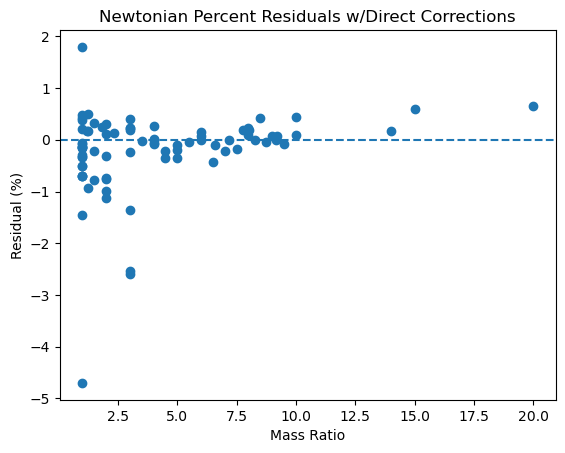

In [25]:
direct_corrections = loaded_model.predict(init_param)

#plt.scatter(df_3["reference_mass_ratio"], (Newtonian_CHT([ref_orb_period, df_3["reference_mass_ratio"]]) - CHT*(1 + corrections))/CHT)
#While the line of code above has a more intuitive interpretation based on how I actually defined the corrections, the code below ends up plotting that
#always has a smaller error because it always overestimates CHT at high mass ratios but is pretty accurate at low mass ratios (never negative)
plt.scatter(df_3["reference_mass_ratio"], 100*(Newtonian_CHT([ref_orb_period, df_3["reference_mass_ratio"]]) - direct_corrections - CHT)/CHT)
plt.axhline(0, linestyle = '--')
plt.xlabel("Mass Ratio")
plt.ylabel("Residual (%)")
plt.title("Newtonian Percent Residuals w/Direct Corrections")
plt.savefig(r"Newtonian_Percent_Residuals_with_Direct_Corrections.png")

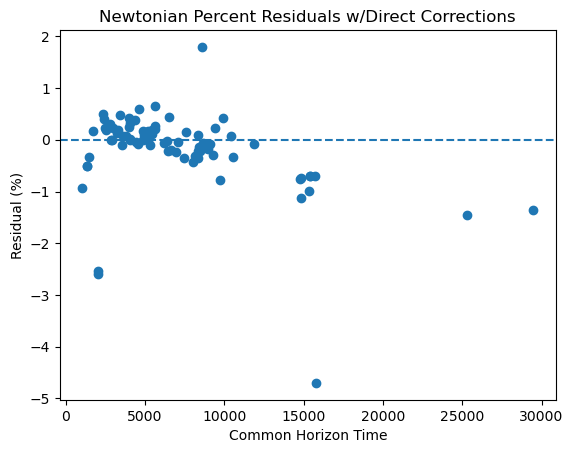

In [27]:
plt.scatter(CHT, 100*(Newtonian_CHT([ref_orb_period, df_3["reference_mass_ratio"]]) - direct_corrections - CHT)/CHT)
plt.axhline(0, linestyle = '--')
plt.xlabel("Common Horizon Time")
plt.ylabel("Residual (%)")
plt.title("Newtonian Percent Residuals w/Direct Corrections")
plt.savefig(r"Newt_Per_Resid_Dir_Corrected_CHT_Distribution.png")